In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import missingno as msno
pd.options.display.max_columns = None

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import zip codes
zip_codes = pd.read_csv('Carvana/zip_codes.csv')

In [4]:
zip_codes = zip_codes[['Zipcode','State']]

In [5]:
zip_codes.shape

(81831, 2)

In [6]:
zip_codes.head()

,Zipcode,State
0,704,PR
1,704,PR
2,704,PR
3,704,PR
4,704,PR


In [7]:
# Load our dataset
df = pd.read_csv('Carvana/carvana.csv')

In [8]:
# Take a glance at our dataset
df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
0,1,1/7/2009 0:12,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,0
1,2,1/7/2009 0:12,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,0
2,3,1/7/2009 0:12,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,0
3,4,1/7/2009 0:12,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,2.0,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594,0
4,5,1/21/2009 0:12,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,76173,AMERICAN,LARGE TRUCK,CHRYSLER,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,NaN,NaN,19638,33619,FL,8800.0,0,920,0


In [9]:
# Take a look at dataset shape
df.shape

(6798, 34)

In [10]:
df['VehicleAge'].value_counts()

4    1588
3    1453
5    1214
2     792
6     754
7     429
1     295
8     207
9      66
Name: VehicleAge, dtype: int64

## Look at the data

#### Dataset is labeled as 0s and 1s

•0 = Good Buy                                                                                                          
•1 = Bad Buy

In [11]:
All = df.shape[0]
good_buy_pct = len(df[df['IsBadBuy'] == 0]) / All
bad_buy_pct = len(df[df['IsBadBuy'] == 1]) / All
print(f'Good buy: {good_buy_pct*100} %')
print(f'Bad buy:  {bad_buy_pct*100} %')

Good buy: 87.26095910561929 %
Bad buy:  12.739040894380702 %


Text(0,0.5,'Frequency')

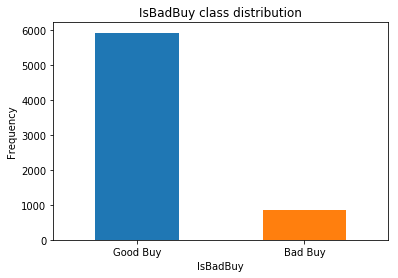

In [12]:
# Now we will plot IsBadBuy against Frequency
labels = ['Good Buy', 'Bad Buy']
classes = pd.value_counts(df['IsBadBuy'],sort = True)
classes.plot(kind='bar',rot=0)
plt.title("IsBadBuy class distribution")
plt.xticks(range(2),labels)
plt.xlabel("IsBadBuy")
plt.ylabel("Frequency")

In [13]:
df['Auction'].unique()

array(['ADESA', 'OTHER', nan], dtype=object)

In [14]:
df['Trim'].unique()

array(['SXT', 'ZX3', 'ES', 'ST', nan, 'Lar', 'Bas', 'GL', 'EX', 'Edg',
       'SEL', 'ZX4', 'LT', 'XLT', 's', 'Tou', 'SE', 'CE', 'GS', 'XLS',
       'GLS', 'LS', 'XL', 'Lim', 'SE-', 'SLT', 'S', 'Nor', 'GLE', '3',
       'X', '2', 'LX', 'SES', 'eL', 'SLE', 'Spo', 'Ren', 'LE', 'RT',
       '150', 'XE', 'Max', 'GT', 'ZTS', 'Edd', 'CX', 'Adv', 'ZX5', 'i',
       'Pre', 'Z71', 'W/T', 'Cla', '1', 'R/T', 'GTP', 'Ove', 'Cus', 'ZTW',
       'Exe', 'LW3', 'Pro', 'STX', 'SX', 'SV6', 'CXS', 'L30', 'DX', 'SL1',
       'L20', 'LXi', 'Spy', 'LTZ', 'SC2', 'VP', 'SR5', 'ZXW', 'Plu',
       'SL2', 'SL', 'C', 'DS', 'Her', 'Hig', 'XRS', 'DE', 'SS', 'CXL',
       'Maz', 'GTC', 'FX4', 'SVT', 'Kin', 'Lux', 'Spe', 'Val', 'Z24',
       'eC', 'L10', 'Sta', 'GXE', 'LW2', 'JLS', 'ZX2'], dtype=object)

In [15]:
df['Size'].unique()

array(['MEDIUM', 'COMPACT', 'LARGE TRUCK', 'MEDIUM SUV', 'SPECIALTY',
       'SMALL TRUCK', 'LARGE', 'LARGE SUV', 'CROSSOVER', 'SPORTS', 'VAN',
       'SMALL SUV', nan], dtype=object)

In [16]:
df.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
count,6798.000000,6798.000000,6798.000000,6515.000000,6798.000000,6797.000000,6797.000000,6797.000000,6797.000000,6777.000000,6777.000000,6777.000000,6777.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000
mean,3399.500000,2005.332451,4.183142,1.490407,71499.390115,6153.684125,7405.387524,8517.821539,9880.576431,6152.180906,7418.757710,8786.704146,10168.581231,26244.618270,57898.912474,6759.792239,0.027067,1272.778758,0.127390
std,1962.557897,1.733395,1.719690,0.516856,14646.256617,2465.206950,2731.341954,3145.988442,3383.682106,2431.564892,2682.628698,3088.425185,3305.444219,25322.610147,26081.837405,1745.699606,0.162290,597.720416,0.333434
min,1.000000,2001.000000,1.000000,1.000000,15249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,2150.000000,0.000000,462.000000,0.000000
25%,1700.250000,2004.000000,3.000000,1.000000,62002.750000,4273.000000,5415.000000,6301.000000,7493.000000,4274.000000,5434.000000,6531.000000,7810.000000,17675.000000,30331.000000,5465.000000,0.000000,834.000000,0.000000
50%,3399.500000,2005.000000,4.000000,1.000000,73562.000000,6148.000000,7353.000000,8473.000000,9821.000000,6091.000000,7352.000000,8760.000000,10114.000000,19662.000000,74135.000000,6740.000000,0.000000,1169.000000,0.000000
75%,5098.750000,2007.000000,5.000000,2.000000,82551.750000,7774.000000,9014.000000,10626.000000,12083.000000,7720.000000,9014.000000,10884.000000,12308.000000,22808.000000,80022.000000,7935.000000,0.000000,1623.000000,0.000000
max,6798.000000,2009.000000,9.000000,3.000000,112029.000000,21611.000000,24015.000000,23840.000000,26436.000000,21837.000000,25847.000000,24084.000000,28415.000000,99761.000000,98064.000000,19000.000000,1.000000,6819.000000,1.000000


### Vehicle age distribution

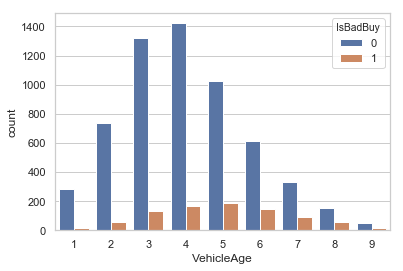

In [17]:
sns.set(style="whitegrid")

g = sns.countplot(x="VehicleAge", hue="IsBadBuy", data=df)

### Data distributions

In [18]:
num_vars = df.select_dtypes(exclude=['object','datetime'])
cat_vars = df.select_dtypes(include=['object'])

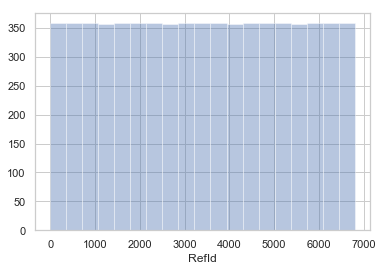

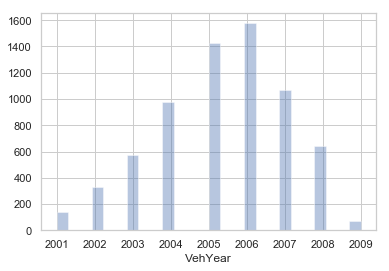

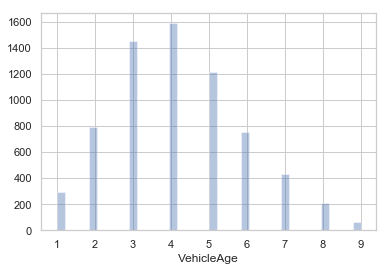

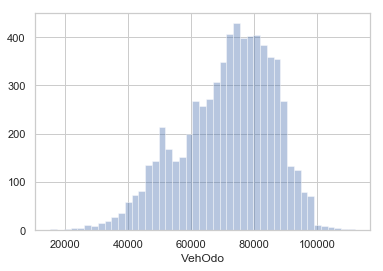

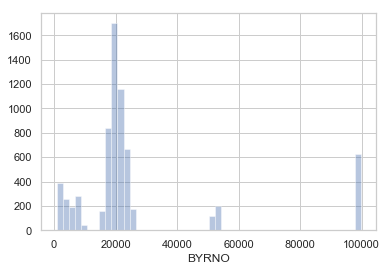

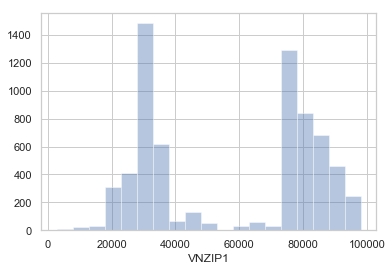

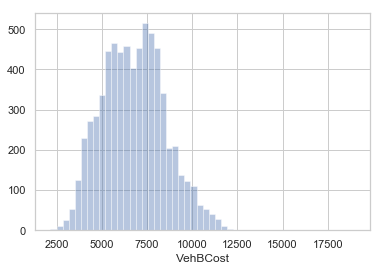

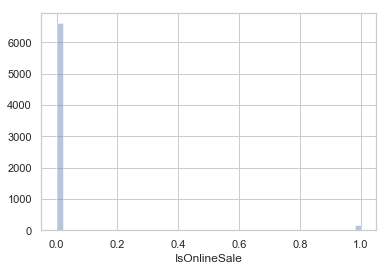

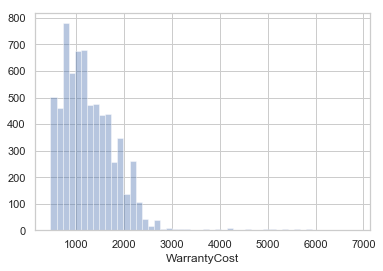

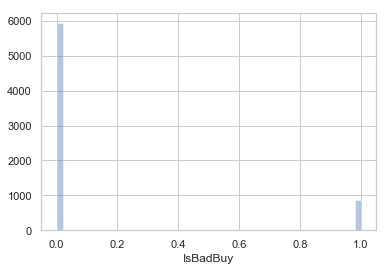

In [19]:
for column in num_vars.columns:
    if df[column].isnull().sum() == 0:
        plt.figure()
        sns.distplot(df[column],kde=False)

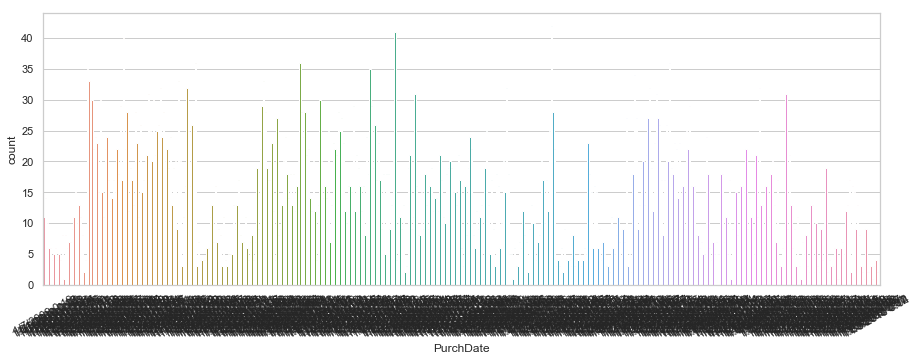

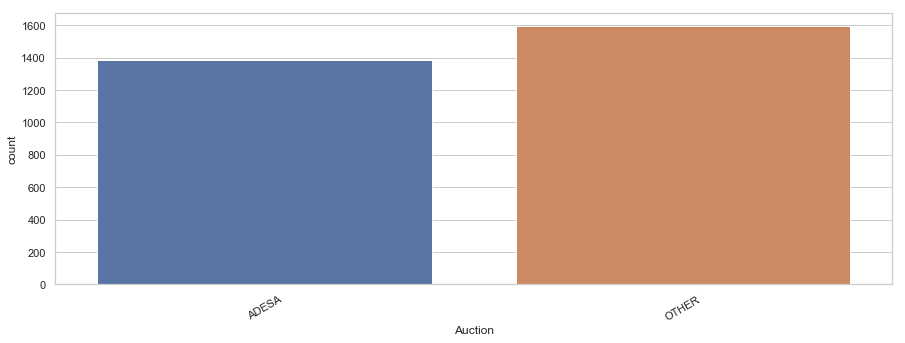

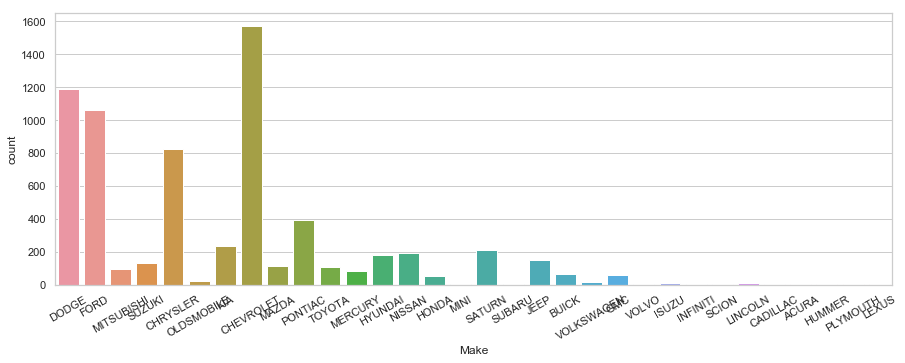

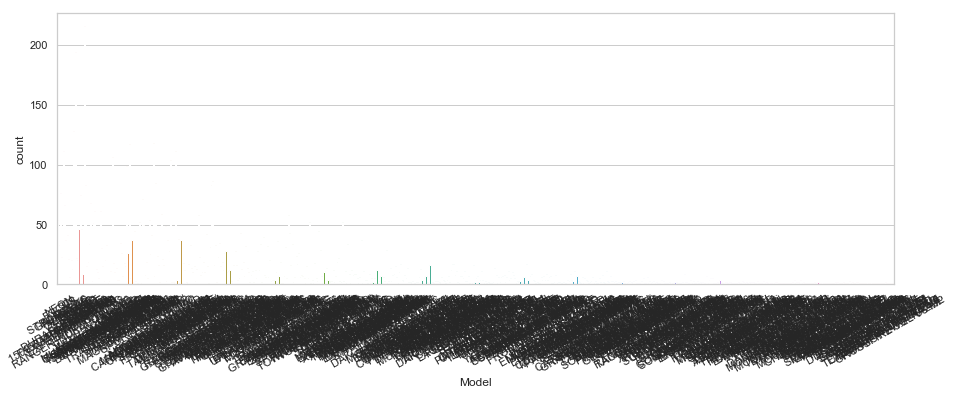

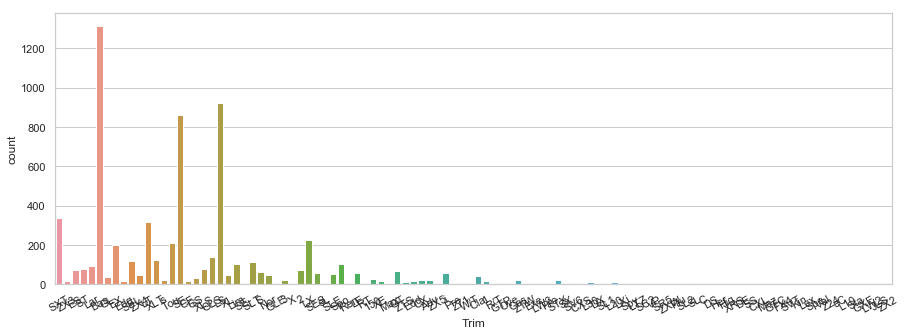

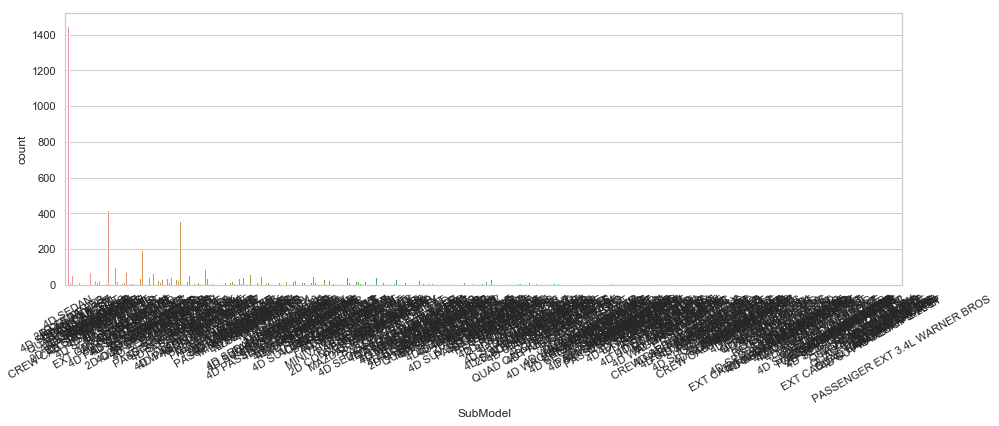

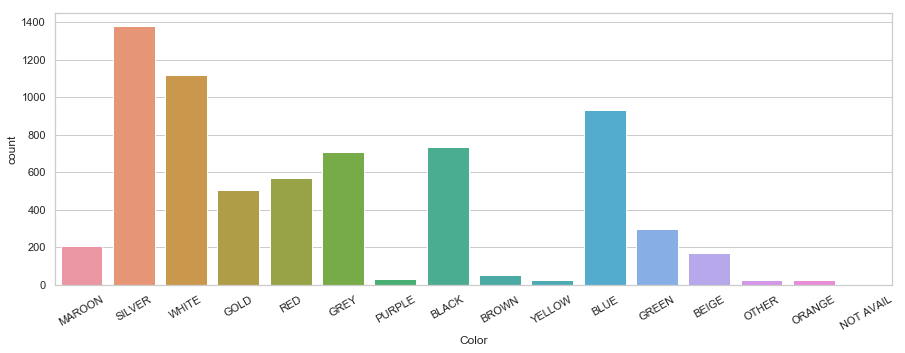

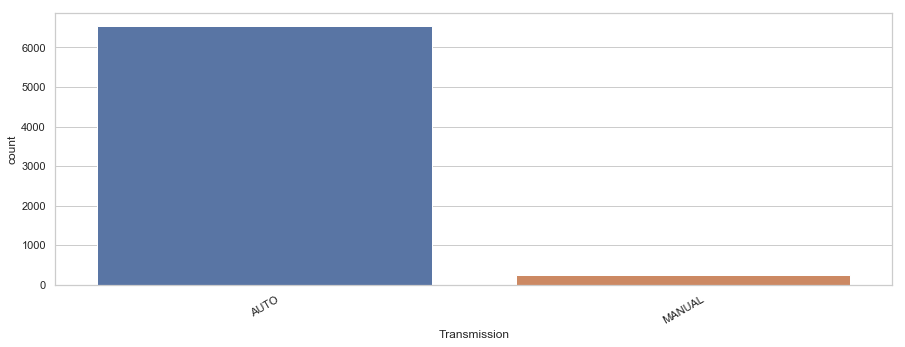

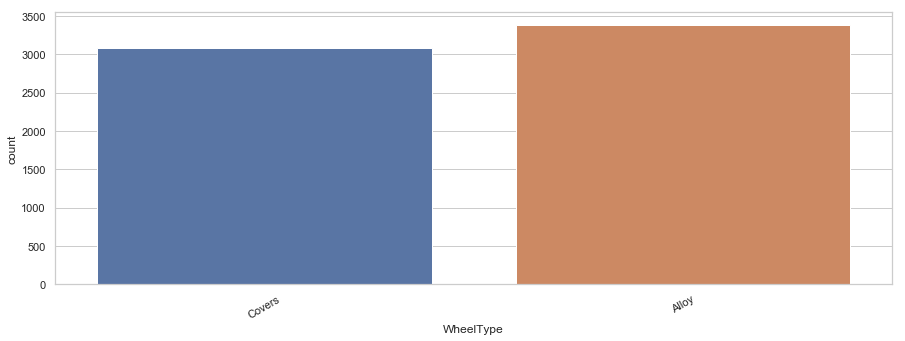

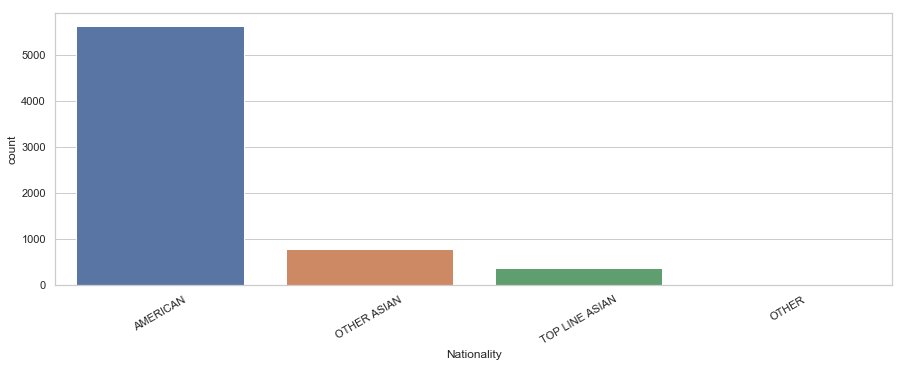

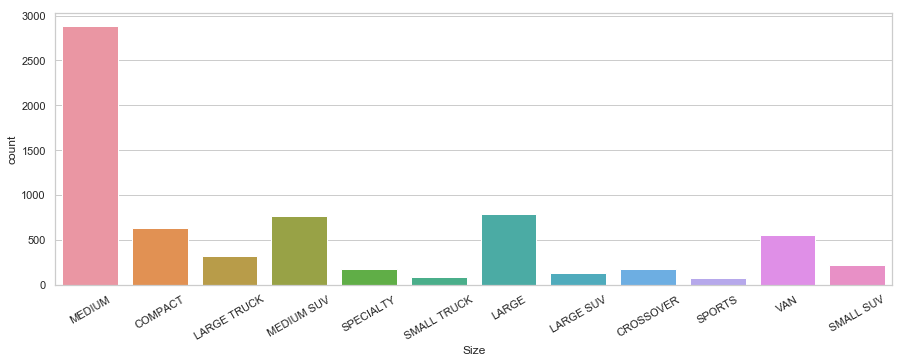

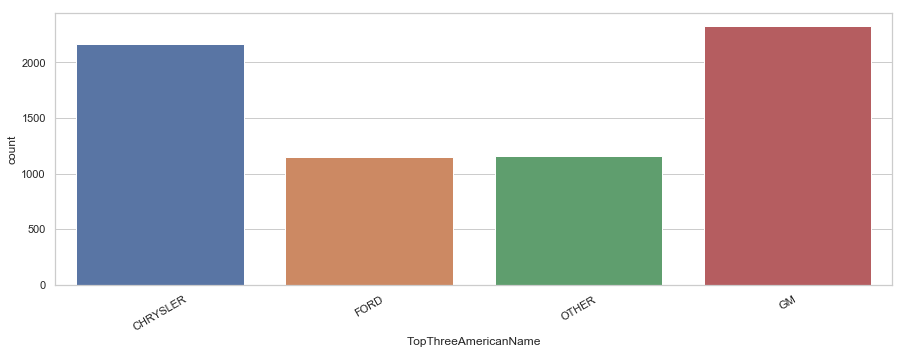

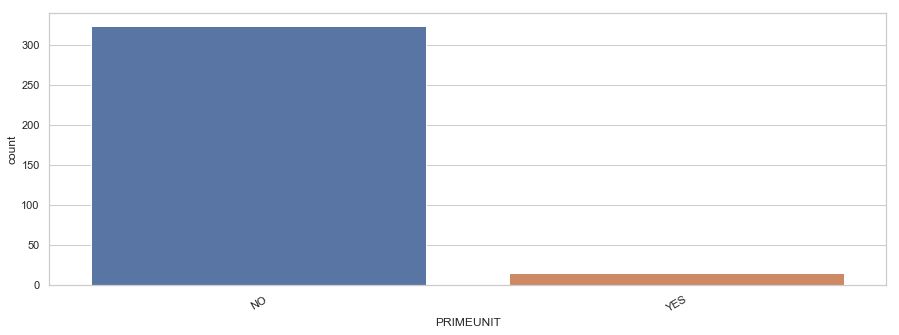

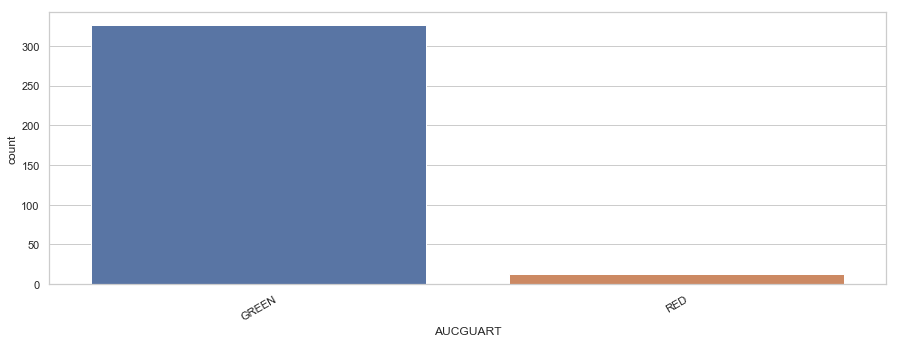

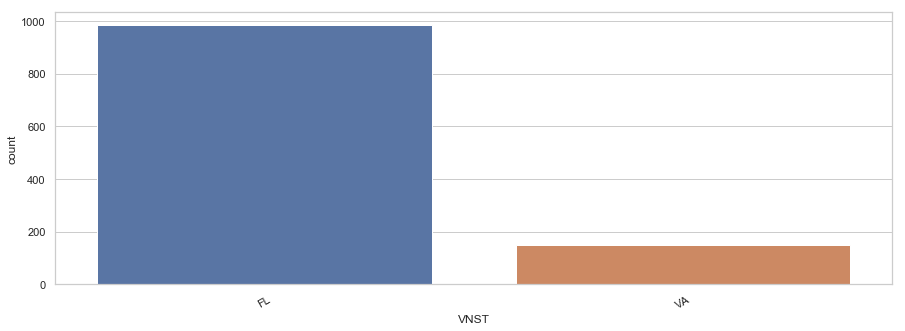

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
for column in cat_vars.columns:
    plt.figure()
    g = sns.countplot(df[column])
    g.set_xticklabels(g.get_xticklabels(),rotation=30)

### Categorical data

In [21]:
df.dtypes

RefId                                  int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrent

In [22]:
# Converting purchase date to datetime type
df['PurchDate'] = pd.to_datetime(df['PurchDate'], format="%m/%d/%Y %H:%M")

In [23]:
# We want to extract some data from categorical features
# We want to get Valves, WheelDrive from Model and Number of doors from Submodel
df['Valves'] = df['Model'].str.extract(r'V(\d)')
df['WheelDrive'] = df['Model'].str.extract(r'(\d)WD')
df['DoorsNumber'] = df['SubModel'].str.extract(r'(\d)D')

In [24]:
df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,Valves,WheelDrive,DoorsNumber
0,1,2009-01-07 00:12:00,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,0,6,NaN,4
1,2,2009-01-07 00:12:00,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,0,NaN,NaN,4
2,3,2009-01-07 00:12:00,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,0,NaN,NaN,2
3,4,2009-01-07 00:12:00,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,2.0,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594,0,NaN,NaN,4
4,5,2009-01-21 00:12:00,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,76173,AMERICAN,LARGE TRUCK,CHRYSLER,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,NaN,NaN,19638,33619,FL,8800.0,0,920,0,NaN,2,NaN


## Looking at NaN values

In [25]:
# Lets check for missing values
df.isnull().values.sum()

33828

In [26]:
# Now lets check for each column
df.isnull().sum()

RefId                                   0
PurchDate                               0
Auction                              3815
VehYear                                 0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                  232
SubModel                                0
Color                                   0
Transmission                            0
WheelTypeID                           283
WheelType                             339
VehOdo                                  0
Nationality                             1
Size                                    1
TopThreeAmericanName                    1
MMRAcquisitionAuctionAveragePrice       1
MMRAcquisitionAuctionCleanPrice         1
MMRAcquisitionRetailAveragePrice        1
MMRAcquisitonRetailCleanPrice           1
MMRCurrentAuctionAveragePrice          21
MMRCurrentAuctionCleanPrice            21
MMRCurrentRetailAveragePrice      

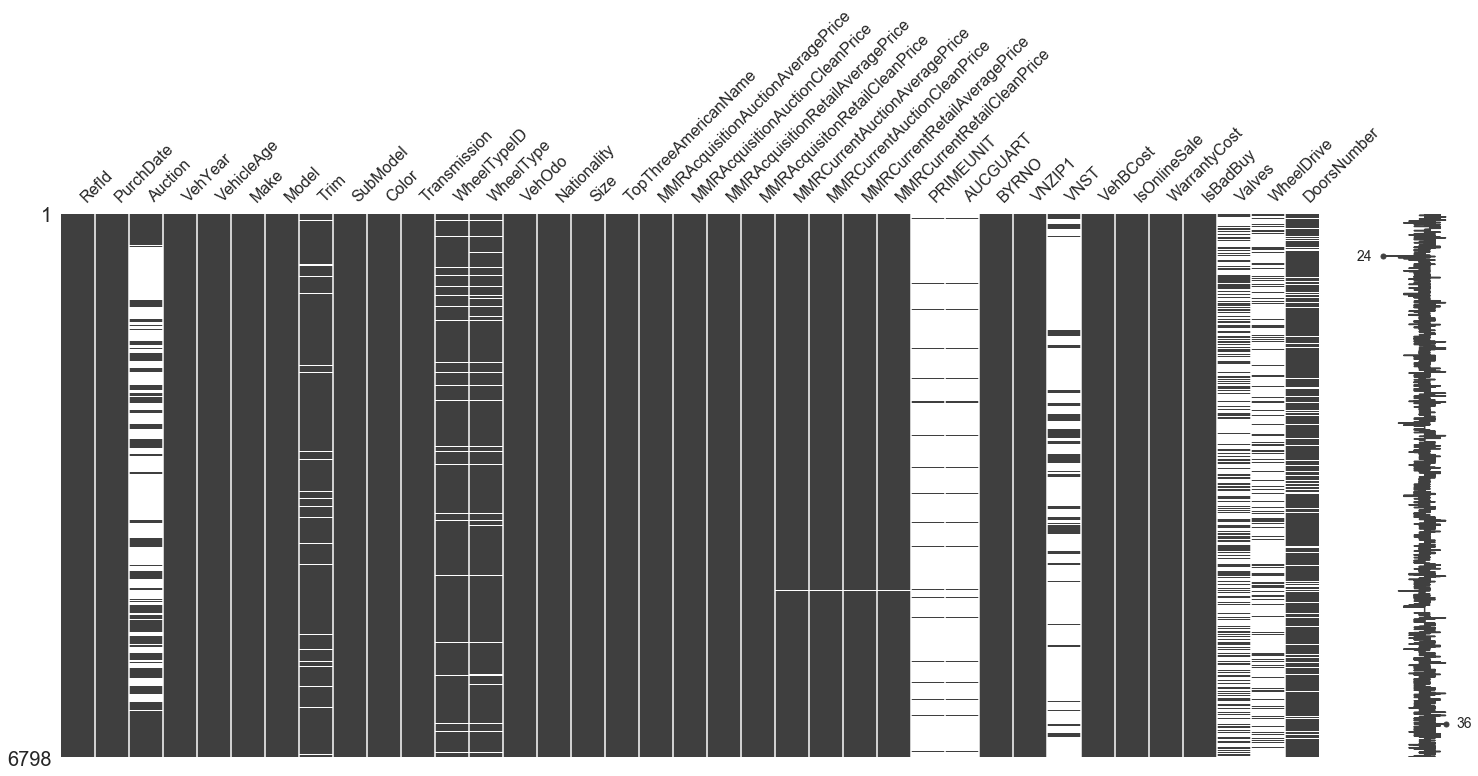

In [27]:
msno.matrix(df)

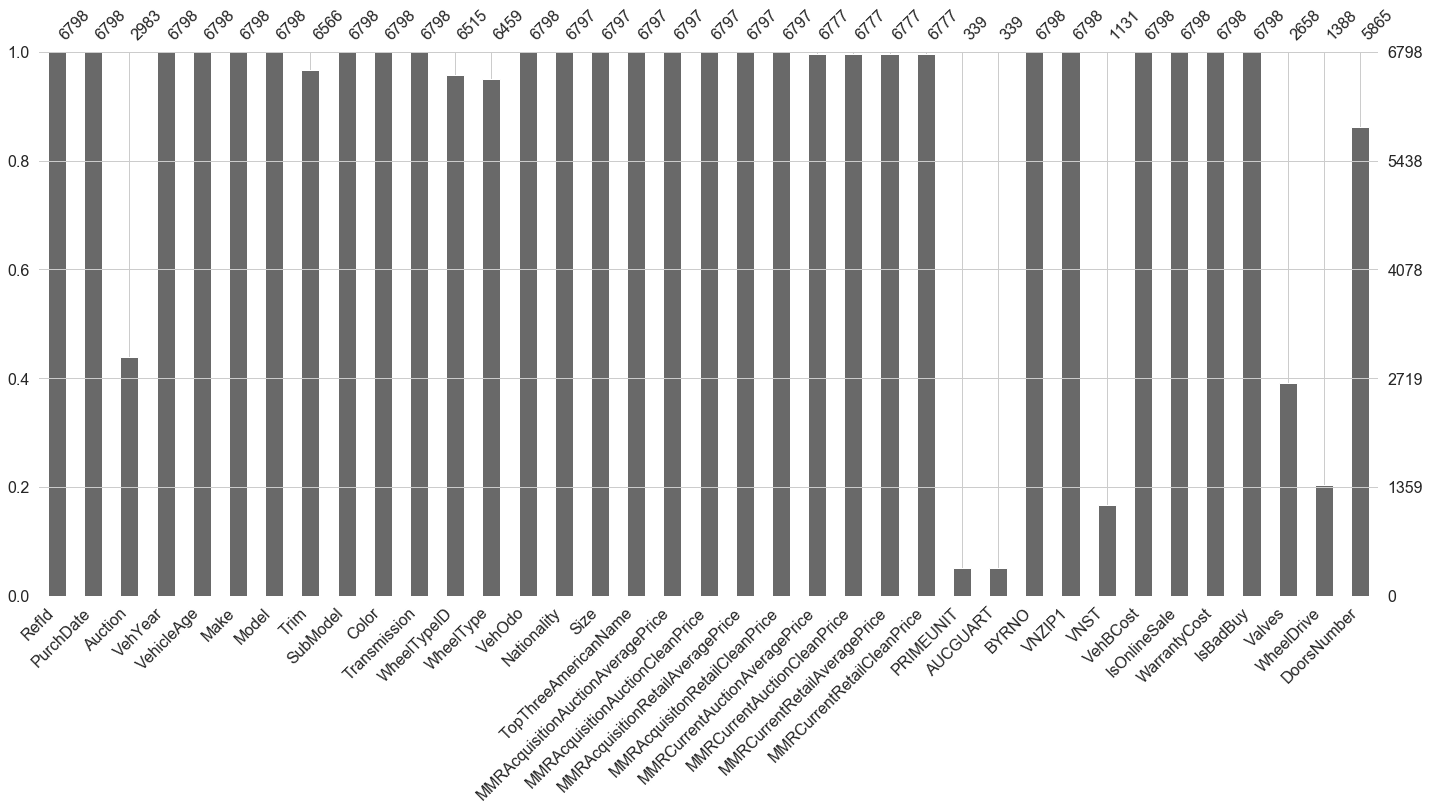

In [28]:
# Percentage of null values in each column
msno.bar(df)

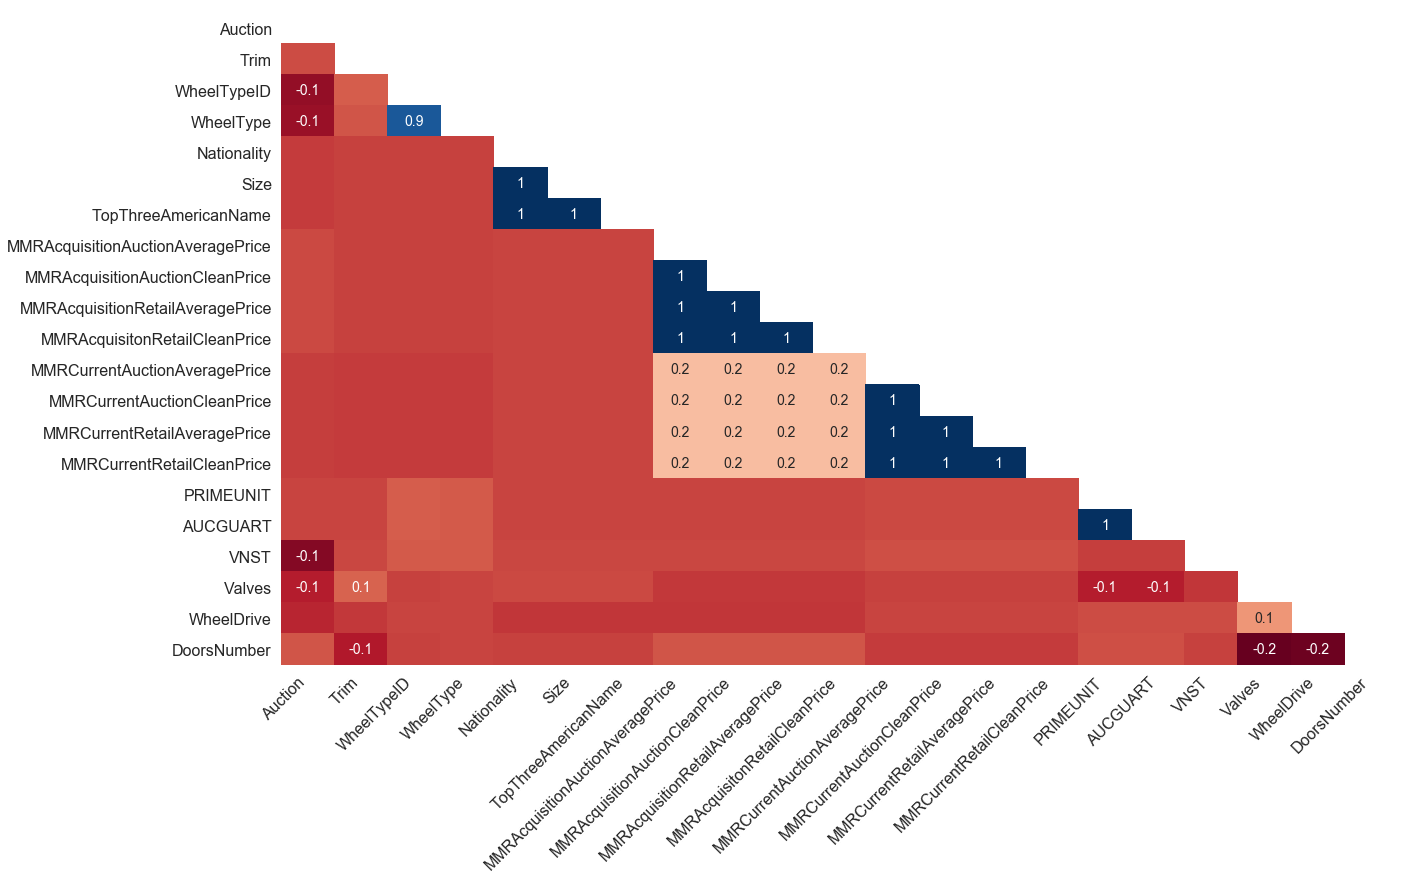

In [29]:
msno.heatmap(df)

### Missing value imputation

In [30]:
df['WheelType'].value_counts()

Alloy     3376
Covers    3083
Name: WheelType, dtype: int64

In [31]:
# We will fill NaN values with Alloy
df['WheelType'].fillna('Alloy', inplace=True)

In [32]:
df[num_vars.columns].isnull().sum()

RefId                                  0
VehYear                                0
VehicleAge                             0
WheelTypeID                          283
VehOdo                                 0
MMRAcquisitionAuctionAveragePrice      1
MMRAcquisitionAuctionCleanPrice        1
MMRAcquisitionRetailAveragePrice       1
MMRAcquisitonRetailCleanPrice          1
MMRCurrentAuctionAveragePrice         21
MMRCurrentAuctionCleanPrice           21
MMRCurrentRetailAveragePrice          21
MMRCurrentRetailCleanPrice            21
BYRNO                                  0
VNZIP1                                 0
VehBCost                               0
IsOnlineSale                           0
WarrantyCost                           0
IsBadBuy                               0
dtype: int64

In [34]:
# As we see the most problematic features are PRIMEUNIT and AUCGUARD
# For numerical variables where we have NaN values, we can use mean value imputation

df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].mean(skipna=True),inplace=True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].mean(skipna=True),inplace=True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].mean(skipna=True),inplace=True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].mean(skipna=True),inplace=True)

df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].mean(skipna=True),inplace=True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].mean(skipna=True),inplace=True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].mean(skipna=True),inplace=True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].mean(skipna=True),inplace=True)

In [35]:
df[num_vars.columns].isnull().sum()

RefId                                  0
VehYear                                0
VehicleAge                             0
WheelTypeID                          283
VehOdo                                 0
MMRAcquisitionAuctionAveragePrice      0
MMRAcquisitionAuctionCleanPrice        0
MMRAcquisitionRetailAveragePrice       0
MMRAcquisitonRetailCleanPrice          0
MMRCurrentAuctionAveragePrice          0
MMRCurrentAuctionCleanPrice            0
MMRCurrentRetailAveragePrice           0
MMRCurrentRetailCleanPrice             0
BYRNO                                  0
VNZIP1                                 0
VehBCost                               0
IsOnlineSale                           0
WarrantyCost                           0
IsBadBuy                               0
dtype: int64

In [36]:
# WheelType and WheelTypeId are the same thing, we will leave just WheelType
df.drop(columns='WheelTypeID',inplace=True)

In [37]:
# As we see how correlated VehicleAge and VehYear are
# VehicleAge we get when we subtract VehYear from Year of purchase date
# So we will not use VehicleYear in further analysis
df.drop(columns=['VehYear'],inplace=True)

In [38]:
# RefId is unique for each observation so we will drop it from df
df.drop(columns='RefId',inplace=True)

In [39]:
df['Trim'].fillna(df['Trim'].value_counts()[0],inplace=True)

In [40]:
# As vnst represents STATE, or location where purchase was held
# VNZIP1 also is ZIP code
# Create dictionary from zip_codes columns
map_dict = pd.Series(zip_codes['State'],index=zip_codes['Zipcode']).to_dict()
df['VNST'] = df['VNZIP1'].map(map_dict)

In [41]:
# We remove VNZIP1, because its only ZIP code and VNST represents state
df.drop(columns='VNZIP1',inplace=True)

In [42]:
# PRIMEUNIT and AUCGUART are the most problematic
# because we have roughly 96% missing values in these two columns, we decided to drop them
df.drop(columns=['AUCGUART','PRIMEUNIT'],inplace=True)

In [43]:
df['Auction'].value_counts()

OTHER    1598
ADESA    1385
Name: Auction, dtype: int64

In [44]:
df['Auction'].fillna('OTHER',inplace=True)

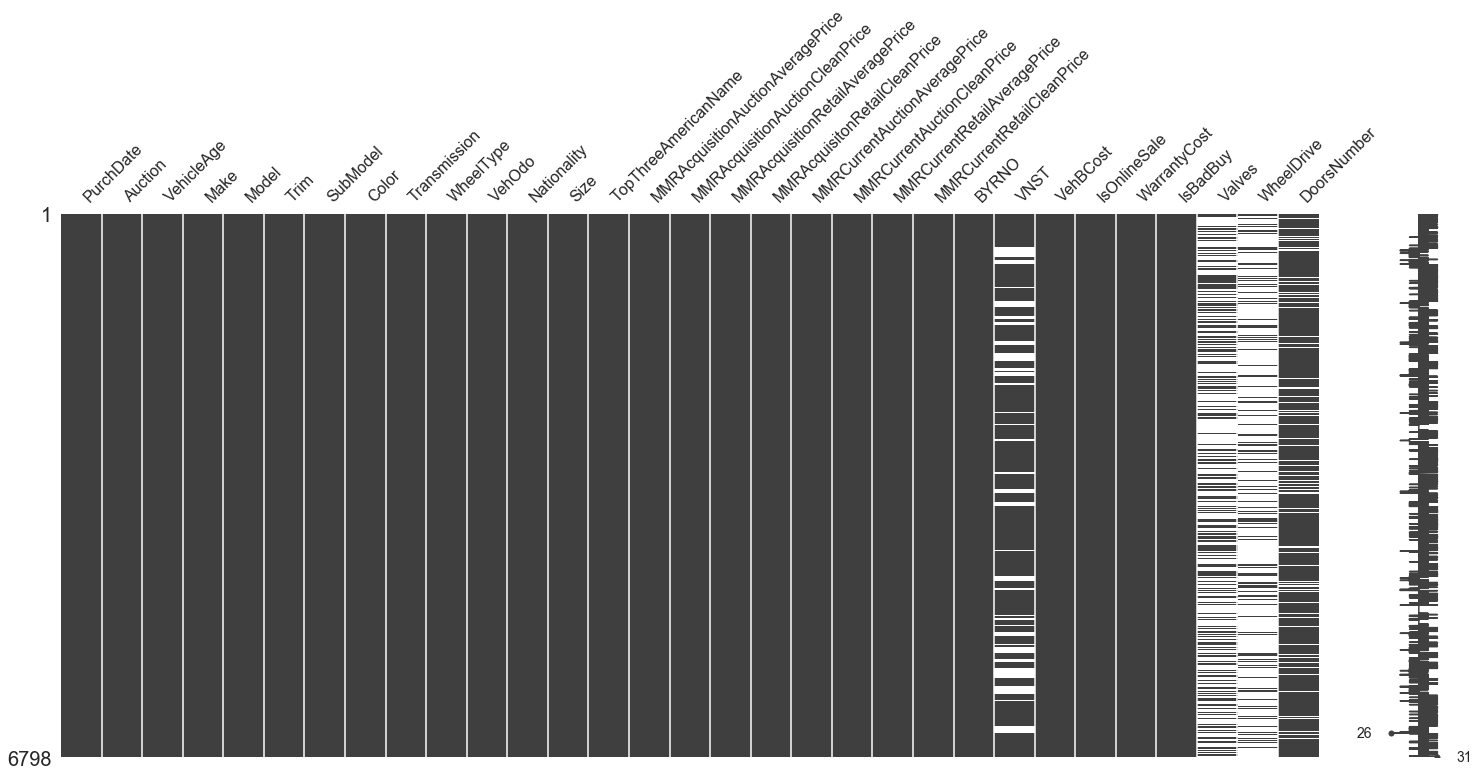

In [45]:
msno.matrix(df)

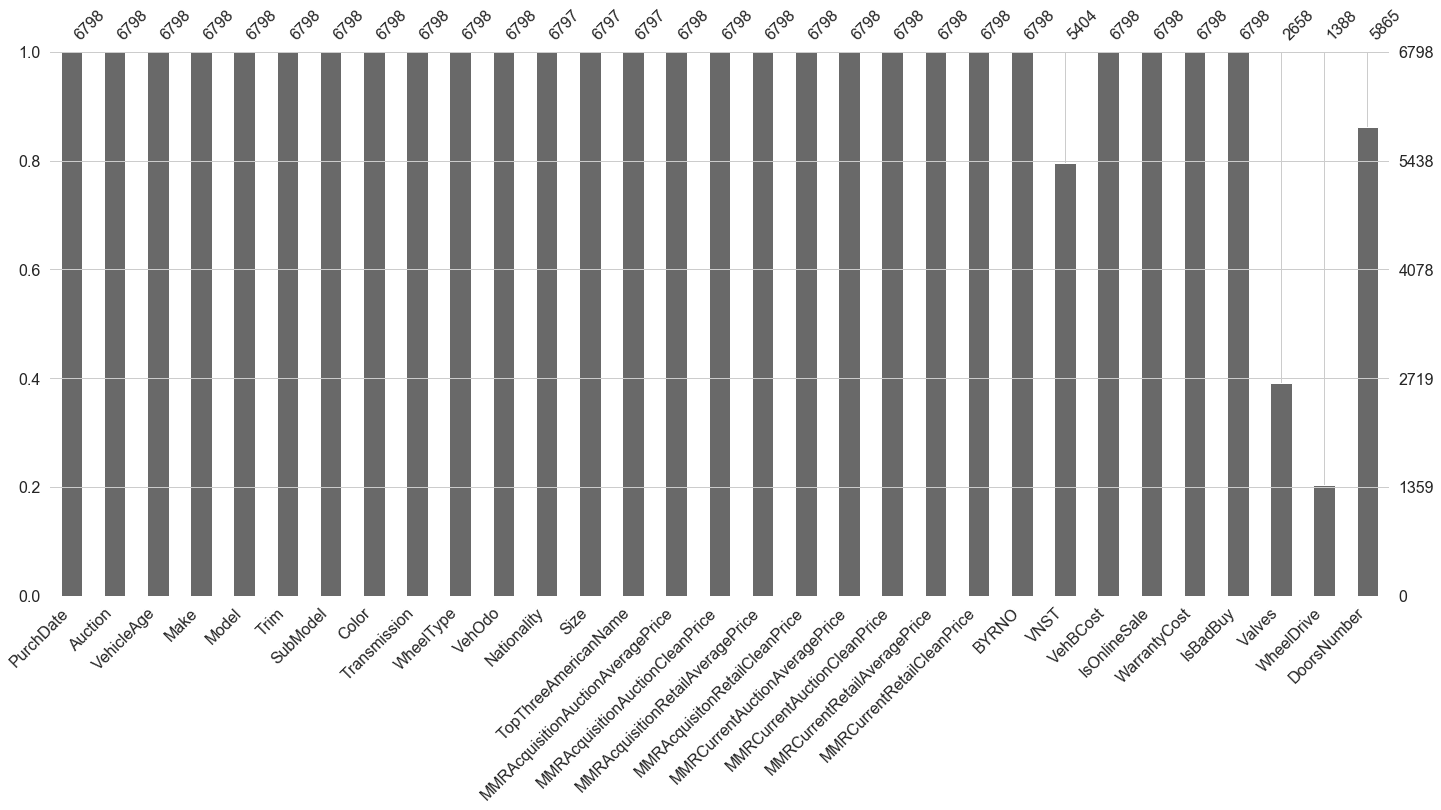

In [46]:
msno.bar(df)

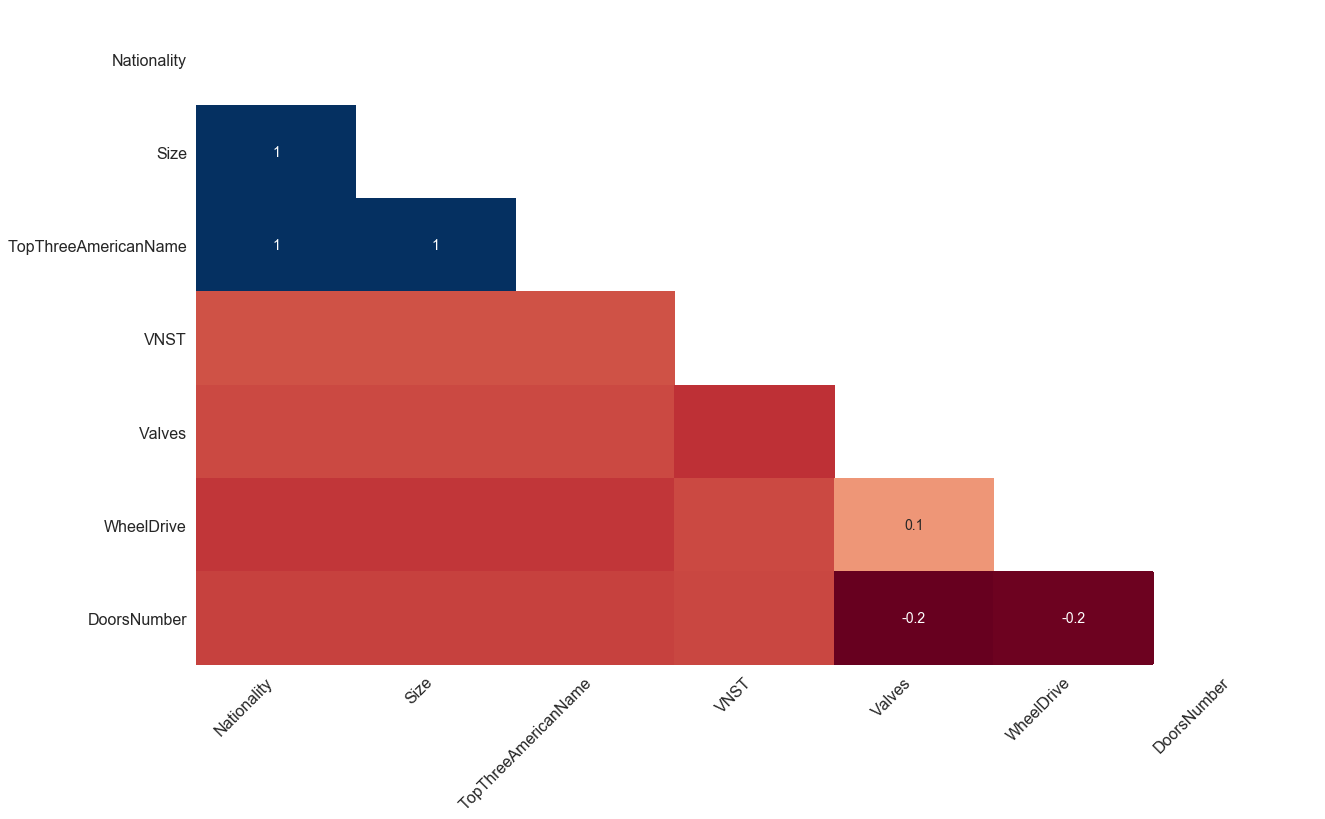

In [47]:
msno.heatmap(df)

## Correlation matrix

In [48]:
corr = df.corr()

In [49]:
sns.set(style='white')

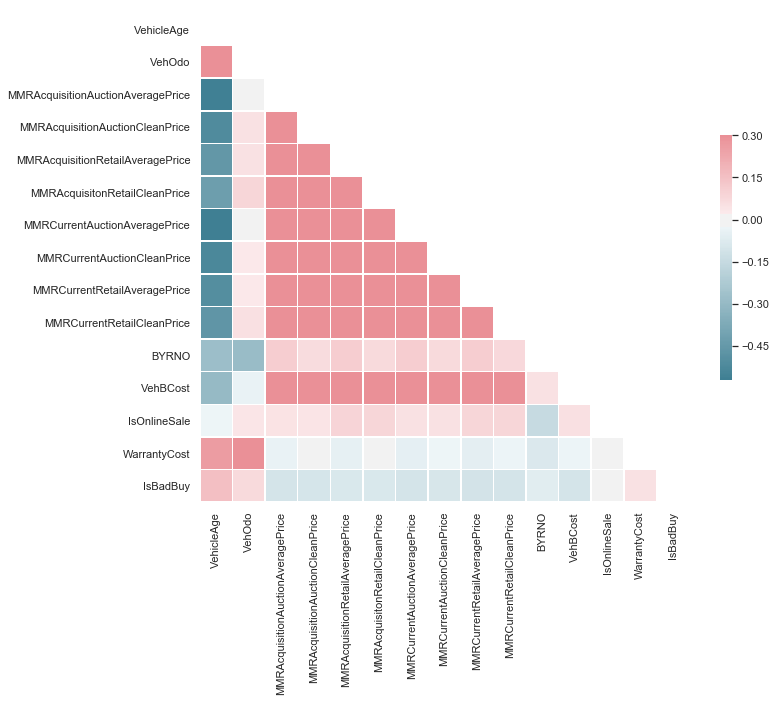

In [50]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Data transformation

In [56]:
# Now lets check for all categorical and numerical features
num_vars_1 = df.select_dtypes(exclude=['object','datetime'])
cat_vars_1 = df.select_dtypes(include='object')

In [57]:
names_1 = num_vars_1.columns
names_1 = list(names_1)
names_1.remove('IsBadBuy')
names_1.remove('IsOnlineSale')
num_vars_1 = num_vars_1[names_1]
num_vars_1.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,WarrantyCost
0,4,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,4900.0,1389
1,5,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,4100.0,630
2,4,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,4000.0,1020
3,5,81054,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,19638,5600.0,594
4,5,76173,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,19638,8800.0,920


In [58]:
# We will standardize all our numerical features

from sklearn import preprocessing


scaler_1 = preprocessing.StandardScaler()

scaled_nums_1 = scaler_1.fit_transform(num_vars_1)
scaled_nums_1 = pd.DataFrame(scaled_nums_1, columns=names_1)

In [59]:
scaled_nums_1.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,WarrantyCost
0,-0.106505,0.157568,-1.197513,-0.968673,-0.500654,-0.420780,-0.872119,-0.695131,-0.532105,-0.444406,-0.260917,-1.065435,0.194455
1,0.475038,-0.401661,-1.728581,-1.732146,-1.227083,-1.238649,-1.774647,-1.782021,-1.430781,-1.409228,-0.260917,-1.523737,-1.075463
2,-0.106505,-0.145604,-0.909057,-0.861018,-0.252683,-0.346885,-1.196716,-1.133098,-0.664101,-0.684097,-0.260917,-1.581025,-0.422936
3,0.475038,0.652406,-0.913926,-0.914479,-0.576000,-0.385310,-0.594482,-0.594320,-0.206817,-0.217443,-0.260917,-0.664420,-1.135696
4,0.475038,0.319123,0.102772,0.236407,0.591373,0.757400,0.414734,0.565751,0.761587,0.724652,-0.260917,1.168791,-0.590250


In [60]:
# Here we will transform categorical features into dummies
dummies_1 = pd.get_dummies(cat_vars_1)
dummies_1.head()

,Auction_ADESA,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Model_1500 RAM PICKUP 2WD,Model_1500 RAM PICKUP 4WD,Model_1500 SIERRA PICKUP 2,Model_1500 SILVERADO PICKU,Model_1500HD SILVERADO PIC,Model_2500 RAM PICKUP 2WD,Model_2500HD SILVERADO PIC,Model_3.2 TL,Model_3.2 TL 3.2L V6 EFI,Model_300,Model_300 2.7L V6 MPI,Model_300 3.5L / 6.0L V12,Model_300 3.5L V6 MPI,Model_300 3.5L V6 MPI / SM,Model_300C,Model_300C 5.7L V8 SFI,Model_300M,Model_350Z 3.5L V6 MPI,Model_ACCENT,Model_ACCENT 1.6L I4 MPI,Model_ACCENT MFI I-4 1.6L,Model_ACCORD 4C,Model_ACCORD 4C 2.3L I4 EF,Model_ACCORD 4C 2.4L I-4 M,Model_ACCORD 4C 2.4L I4 MP,Model_ACCORD V6,Model_ACCORD V6 3.0L V6 EF,Model_AERIO,Model_AERIO 2.0L I4 EFI,Model_ALERO 4C,Model_ALERO 4C 2.2L I4 MPI,Model_ALERO V6,Model_ALERO V6 3.4L V6 MPI,Model_ALTIMA,Model_ALTIMA 2.5L I-4 EFI,Model_ALTIMA 2.5L I4 EFI,Model_ALTIMA 2.5L I4 MPI,Model_ALTIMA 2.5L I4 MPI /,Model_ALTIMA 3.5L V6 MPI,Model_ALTIMA MFI I-4 2.5L,Model_ALTIMA Multiple Engi,Model_AMANTI,Model_AMANTI 3.5L V6 MPI,Model_ARMADA 2WD V8,Model_ASCENDER 2WD 6C,Model_ASCENDER 2WD 6C 4.2L,Model_AURA,Model_AURA 4C,Model_AURA V6,Model_AVALANCHE 1500 2WD V,Model_AVENGER,Model_AVENGER 4C,Model_AVENGER 4C 2.4L I4 S,Model_AVENGER V6,Model_AVEO,Model_AVEO 1.6L I-4 EFI DO,Model_AVEO 1.6L I-4 MPI DO,Model_AVEO 1.6L I4 EFI,Model_AVEO 1.6L I4 EFI / M,Model_AVIATOR 2WD V8,Model_B2300 PICKUP 2WD 4C,Model_B3000 PICKUP 2WD V6,Model_B3000 PICKUP 4WD V6,Model_BEETLE,Model_BEETLE 2.0L I4 EFI,Model_BEETLE 2.0L I4 MFI /,Model_BONNEVILLE,Model_BONNEVILLE 3.8L V6 S,Model_BRAVADA 2WD V6 4.2L,Model_BRAVADA AWD V6 4.2L,Model_CALIBER,Model_CALIBER 2.0L I4 SFI,Model_CAMARO V6 3.8L V6 MF,Model_CAMRY 4C,Model_CAMRY 4C 2.4L I-4 EF,Model_CAMRY 4C 2.4L I-4 SF,Model_CAMRY 4C 2.4L I4 EFI,Model_CAMRY 4C 2.4L I4 SFI,Model_CAMRY 4C Multiple En,Model_CAMRY SOLARA 4C,Model_CAMRY SOLARA V6,Model_CAMRY V6,Model_CAMRY V6 3.0L / 3.3L,Model_CAMRY V6 3.0L V6 SFI,Model_CARAVAN FWD 4C,Model_CARAVAN FWD 4C 2.4L,Model_CARAVAN FWD V6,Model_CARAVAN FWD V6 3.3L,Model_CARAVAN GRAND AWD V6,Model_CARAVAN GRAND FWD V6,Model_CAVALIER 4C,Model_CAVALIER 4C 2.2L I-4,Model_CAVALIER 4C 2.2L I4,Model_CENTURY V6,Model_CENTURY V6 3.1L V6 S,Model_CHARGER,Model_CHARGER 2.7L V6 MPI,Model_CHARGER 3.5L V6 EFI,Model_CHARGER V6,Model_CHARGER V6 2.7L V6 M,Model_CHARGER V6 3.5L V6 E,Model_CHEROKEE 4WD 6C 4.0L,Model_CIVIC,Model_CIVIC 1.7L I4 MPI,Model_COBALT,Model_COBALT 2.2L I4 MPI,Model_COBALT 2.2L I4 MPI /,Model_COLORADO PICKUP 2WD,Model_COMMANDER 2WD V6,Model_COMMANDER 2WD V6 3.7,Model_COMMANDER 2WD V8,Model_COMMANDER 2WD V8 4.7,Model_COMMANDER 4WD V6,Model_COMMANDER 4WD V6 3.7,Model_COMPASS FWD 4C,Model_CONCORDE,Model_CONCORDE 3.5L V6 MPI,Model_CONTINENTAL 4.6L V8,Model_COOPER,Model_COOPER 1.6L I-4 EFI,Model_COROLLA,Model_CR-V 2WD,Model_CR-V 4WD 2.4L I4 MPI,Model_CROSSFIRE 3.2L V6 MP,Model_CTS 3.6L V6 SFI,Model_DAKOTA PICKUP 2WD V6,Model_DAKOTA PICKUP 2WD V8,Model_DAKOTA PICKUP 4WD V8,Model_DURANGO 2WD V6,Model_DURANGO 2WD V6 3.7L,Model_DURANGO 2WD V8,Model_DURANGO 2WD V8 4.7L,Model_DURANGO 2WD V8 5.7L,Model_DURANGO 4WD V8,Model_DURANGO 4WD V8 4.7L,Model_DURANGO 4WD V8 5.7L,Model_DURANGO 4WD V8 SEFI,Model_ECLIPSE,Model_ECLIPSE 2.4L I4 EFI,Model_ECLIPSE 3.8L V6 MPI,Model_EDGE FWD V6,Model_ELANTRA,Model_ELANTRA 2.0L I4 MPI,Model_ELANTRA MFI I-4 2.0L,Model_ELEMENT 2WD,Model_ELEMENT 2WD 2.4L I4,Model_ELEMENT 4WD 2.4L I4,Model_ENDEAVOR AWD,Model_ENDEAVOR AWD 3.8L V6,Model_ENDEAVOR FWD,Model_ENDEAVOR FWD 3.8L V6,Model_ENVOY 2WD 6C,Model_ENVOY 2WD 6C 4.2L I6,Model_ENVOY 4WD 6C,Model_ENVOY 4WD 6C 4.2L I-,Model_ENVOY 4WD 6C 4.2L I6,Model_ENVOY 4WD V8 5.3L V8,Model_ENVOY XL 

In [61]:
# Here we have to append columns like IsBadBuy, IsOnlineSale and dummies into one dataset
df = pd.concat([dummies_1,num_vars_1,df['IsOnlineSale'],df['IsBadBuy']],axis=1)
# for i in [scaled_nums,pd.DataFrame(df_upsampled['IsBadBuy']),pd.DataFrame(df_upsampled['IsOnlineSale']),pd.DataFrame(df_upsampled['PurchDate']),dummies]:
#     print(i.shape) 
df.head()

,Auction_ADESA,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Model_1500 RAM PICKUP 2WD,Model_1500 RAM PICKUP 4WD,Model_1500 SIERRA PICKUP 2,Model_1500 SILVERADO PICKU,Model_1500HD SILVERADO PIC,Model_2500 RAM PICKUP 2WD,Model_2500HD SILVERADO PIC,Model_3.2 TL,Model_3.2 TL 3.2L V6 EFI,Model_300,Model_300 2.7L V6 MPI,Model_300 3.5L / 6.0L V12,Model_300 3.5L V6 MPI,Model_300 3.5L V6 MPI / SM,Model_300C,Model_300C 5.7L V8 SFI,Model_300M,Model_350Z 3.5L V6 MPI,Model_ACCENT,Model_ACCENT 1.6L I4 MPI,Model_ACCENT MFI I-4 1.6L,Model_ACCORD 4C,Model_ACCORD 4C 2.3L I4 EF,Model_ACCORD 4C 2.4L I-4 M,Model_ACCORD 4C 2.4L I4 MP,Model_ACCORD V6,Model_ACCORD V6 3.0L V6 EF,Model_AERIO,Model_AERIO 2.0L I4 EFI,Model_ALERO 4C,Model_ALERO 4C 2.2L I4 MPI,Model_ALERO V6,Model_ALERO V6 3.4L V6 MPI,Model_ALTIMA,Model_ALTIMA 2.5L I-4 EFI,Model_ALTIMA 2.5L I4 EFI,Model_ALTIMA 2.5L I4 MPI,Model_ALTIMA 2.5L I4 MPI /,Model_ALTIMA 3.5L V6 MPI,Model_ALTIMA MFI I-4 2.5L,Model_ALTIMA Multiple Engi,Model_AMANTI,Model_AMANTI 3.5L V6 MPI,Model_ARMADA 2WD V8,Model_ASCENDER 2WD 6C,Model_ASCENDER 2WD 6C 4.2L,Model_AURA,Model_AURA 4C,Model_AURA V6,Model_AVALANCHE 1500 2WD V,Model_AVENGER,Model_AVENGER 4C,Model_AVENGER 4C 2.4L I4 S,Model_AVENGER V6,Model_AVEO,Model_AVEO 1.6L I-4 EFI DO,Model_AVEO 1.6L I-4 MPI DO,Model_AVEO 1.6L I4 EFI,Model_AVEO 1.6L I4 EFI / M,Model_AVIATOR 2WD V8,Model_B2300 PICKUP 2WD 4C,Model_B3000 PICKUP 2WD V6,Model_B3000 PICKUP 4WD V6,Model_BEETLE,Model_BEETLE 2.0L I4 EFI,Model_BEETLE 2.0L I4 MFI /,Model_BONNEVILLE,Model_BONNEVILLE 3.8L V6 S,Model_BRAVADA 2WD V6 4.2L,Model_BRAVADA AWD V6 4.2L,Model_CALIBER,Model_CALIBER 2.0L I4 SFI,Model_CAMARO V6 3.8L V6 MF,Model_CAMRY 4C,Model_CAMRY 4C 2.4L I-4 EF,Model_CAMRY 4C 2.4L I-4 SF,Model_CAMRY 4C 2.4L I4 EFI,Model_CAMRY 4C 2.4L I4 SFI,Model_CAMRY 4C Multiple En,Model_CAMRY SOLARA 4C,Model_CAMRY SOLARA V6,Model_CAMRY V6,Model_CAMRY V6 3.0L / 3.3L,Model_CAMRY V6 3.0L V6 SFI,Model_CARAVAN FWD 4C,Model_CARAVAN FWD 4C 2.4L,Model_CARAVAN FWD V6,Model_CARAVAN FWD V6 3.3L,Model_CARAVAN GRAND AWD V6,Model_CARAVAN GRAND FWD V6,Model_CAVALIER 4C,Model_CAVALIER 4C 2.2L I-4,Model_CAVALIER 4C 2.2L I4,Model_CENTURY V6,Model_CENTURY V6 3.1L V6 S,Model_CHARGER,Model_CHARGER 2.7L V6 MPI,Model_CHARGER 3.5L V6 EFI,Model_CHARGER V6,Model_CHARGER V6 2.7L V6 M,Model_CHARGER V6 3.5L V6 E,Model_CHEROKEE 4WD 6C 4.0L,Model_CIVIC,Model_CIVIC 1.7L I4 MPI,Model_COBALT,Model_COBALT 2.2L I4 MPI,Model_COBALT 2.2L I4 MPI /,Model_COLORADO PICKUP 2WD,Model_COMMANDER 2WD V6,Model_COMMANDER 2WD V6 3.7,Model_COMMANDER 2WD V8,Model_COMMANDER 2WD V8 4.7,Model_COMMANDER 4WD V6,Model_COMMANDER 4WD V6 3.7,Model_COMPASS FWD 4C,Model_CONCORDE,Model_CONCORDE 3.5L V6 MPI,Model_CONTINENTAL 4.6L V8,Model_COOPER,Model_COOPER 1.6L I-4 EFI,Model_COROLLA,Model_CR-V 2WD,Model_CR-V 4WD 2.4L I4 MPI,Model_CROSSFIRE 3.2L V6 MP,Model_CTS 3.6L V6 SFI,Model_DAKOTA PICKUP 2WD V6,Model_DAKOTA PICKUP 2WD V8,Model_DAKOTA PICKUP 4WD V8,Model_DURANGO 2WD V6,Model_DURANGO 2WD V6 3.7L,Model_DURANGO 2WD V8,Model_DURANGO 2WD V8 4.7L,Model_DURANGO 2WD V8 5.7L,Model_DURANGO 4WD V8,Model_DURANGO 4WD V8 4.7L,Model_DURANGO 4WD V8 5.7L,Model_DURANGO 4WD V8 SEFI,Model_ECLIPSE,Model_ECLIPSE 2.4L I4 EFI,Model_ECLIPSE 3.8L V6 MPI,Model_EDGE FWD V6,Model_ELANTRA,Model_ELANTRA 2.0L I4 MPI,Model_ELANTRA MFI I-4 2.0L,Model_ELEMENT 2WD,Model_ELEMENT 2WD 2.4L I4,Model_ELEMENT 4WD 2.4L I4,Model_ENDEAVOR AWD,Model_ENDEAVOR AWD 3.8L V6,Model_ENDEAVOR FWD,Model_ENDEAVOR FWD 3.8L V6,Model_ENVOY 2WD 6C,Model_ENVOY 2WD 6C 4.2L I6,Model_ENVOY 4WD 6C,Model_ENVOY 4WD 6C 4.2L I-,Model_ENVOY 4WD 6C 4.2L I6,Model_ENVOY 4WD V8 5.3L V8,Model_ENVOY XL 

In [62]:
df[num_vars_1.columns] = scaled_nums_1

In [63]:
df.head()

,Auction_ADESA,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Model_1500 RAM PICKUP 2WD,Model_1500 RAM PICKUP 4WD,Model_1500 SIERRA PICKUP 2,Model_1500 SILVERADO PICKU,Model_1500HD SILVERADO PIC,Model_2500 RAM PICKUP 2WD,Model_2500HD SILVERADO PIC,Model_3.2 TL,Model_3.2 TL 3.2L V6 EFI,Model_300,Model_300 2.7L V6 MPI,Model_300 3.5L / 6.0L V12,Model_300 3.5L V6 MPI,Model_300 3.5L V6 MPI / SM,Model_300C,Model_300C 5.7L V8 SFI,Model_300M,Model_350Z 3.5L V6 MPI,Model_ACCENT,Model_ACCENT 1.6L I4 MPI,Model_ACCENT MFI I-4 1.6L,Model_ACCORD 4C,Model_ACCORD 4C 2.3L I4 EF,Model_ACCORD 4C 2.4L I-4 M,Model_ACCORD 4C 2.4L I4 MP,Model_ACCORD V6,Model_ACCORD V6 3.0L V6 EF,Model_AERIO,Model_AERIO 2.0L I4 EFI,Model_ALERO 4C,Model_ALERO 4C 2.2L I4 MPI,Model_ALERO V6,Model_ALERO V6 3.4L V6 MPI,Model_ALTIMA,Model_ALTIMA 2.5L I-4 EFI,Model_ALTIMA 2.5L I4 EFI,Model_ALTIMA 2.5L I4 MPI,Model_ALTIMA 2.5L I4 MPI /,Model_ALTIMA 3.5L V6 MPI,Model_ALTIMA MFI I-4 2.5L,Model_ALTIMA Multiple Engi,Model_AMANTI,Model_AMANTI 3.5L V6 MPI,Model_ARMADA 2WD V8,Model_ASCENDER 2WD 6C,Model_ASCENDER 2WD 6C 4.2L,Model_AURA,Model_AURA 4C,Model_AURA V6,Model_AVALANCHE 1500 2WD V,Model_AVENGER,Model_AVENGER 4C,Model_AVENGER 4C 2.4L I4 S,Model_AVENGER V6,Model_AVEO,Model_AVEO 1.6L I-4 EFI DO,Model_AVEO 1.6L I-4 MPI DO,Model_AVEO 1.6L I4 EFI,Model_AVEO 1.6L I4 EFI / M,Model_AVIATOR 2WD V8,Model_B2300 PICKUP 2WD 4C,Model_B3000 PICKUP 2WD V6,Model_B3000 PICKUP 4WD V6,Model_BEETLE,Model_BEETLE 2.0L I4 EFI,Model_BEETLE 2.0L I4 MFI /,Model_BONNEVILLE,Model_BONNEVILLE 3.8L V6 S,Model_BRAVADA 2WD V6 4.2L,Model_BRAVADA AWD V6 4.2L,Model_CALIBER,Model_CALIBER 2.0L I4 SFI,Model_CAMARO V6 3.8L V6 MF,Model_CAMRY 4C,Model_CAMRY 4C 2.4L I-4 EF,Model_CAMRY 4C 2.4L I-4 SF,Model_CAMRY 4C 2.4L I4 EFI,Model_CAMRY 4C 2.4L I4 SFI,Model_CAMRY 4C Multiple En,Model_CAMRY SOLARA 4C,Model_CAMRY SOLARA V6,Model_CAMRY V6,Model_CAMRY V6 3.0L / 3.3L,Model_CAMRY V6 3.0L V6 SFI,Model_CARAVAN FWD 4C,Model_CARAVAN FWD 4C 2.4L,Model_CARAVAN FWD V6,Model_CARAVAN FWD V6 3.3L,Model_CARAVAN GRAND AWD V6,Model_CARAVAN GRAND FWD V6,Model_CAVALIER 4C,Model_CAVALIER 4C 2.2L I-4,Model_CAVALIER 4C 2.2L I4,Model_CENTURY V6,Model_CENTURY V6 3.1L V6 S,Model_CHARGER,Model_CHARGER 2.7L V6 MPI,Model_CHARGER 3.5L V6 EFI,Model_CHARGER V6,Model_CHARGER V6 2.7L V6 M,Model_CHARGER V6 3.5L V6 E,Model_CHEROKEE 4WD 6C 4.0L,Model_CIVIC,Model_CIVIC 1.7L I4 MPI,Model_COBALT,Model_COBALT 2.2L I4 MPI,Model_COBALT 2.2L I4 MPI /,Model_COLORADO PICKUP 2WD,Model_COMMANDER 2WD V6,Model_COMMANDER 2WD V6 3.7,Model_COMMANDER 2WD V8,Model_COMMANDER 2WD V8 4.7,Model_COMMANDER 4WD V6,Model_COMMANDER 4WD V6 3.7,Model_COMPASS FWD 4C,Model_CONCORDE,Model_CONCORDE 3.5L V6 MPI,Model_CONTINENTAL 4.6L V8,Model_COOPER,Model_COOPER 1.6L I-4 EFI,Model_COROLLA,Model_CR-V 2WD,Model_CR-V 4WD 2.4L I4 MPI,Model_CROSSFIRE 3.2L V6 MP,Model_CTS 3.6L V6 SFI,Model_DAKOTA PICKUP 2WD V6,Model_DAKOTA PICKUP 2WD V8,Model_DAKOTA PICKUP 4WD V8,Model_DURANGO 2WD V6,Model_DURANGO 2WD V6 3.7L,Model_DURANGO 2WD V8,Model_DURANGO 2WD V8 4.7L,Model_DURANGO 2WD V8 5.7L,Model_DURANGO 4WD V8,Model_DURANGO 4WD V8 4.7L,Model_DURANGO 4WD V8 5.7L,Model_DURANGO 4WD V8 SEFI,Model_ECLIPSE,Model_ECLIPSE 2.4L I4 EFI,Model_ECLIPSE 3.8L V6 MPI,Model_EDGE FWD V6,Model_ELANTRA,Model_ELANTRA 2.0L I4 MPI,Model_ELANTRA MFI I-4 2.0L,Model_ELEMENT 2WD,Model_ELEMENT 2WD 2.4L I4,Model_ELEMENT 4WD 2.4L I4,Model_ENDEAVOR AWD,Model_ENDEAVOR AWD 3.8L V6,Model_ENDEAVOR FWD,Model_ENDEAVOR FWD 3.8L V6,Model_ENVOY 2WD 6C,Model_ENVOY 2WD 6C 4.2L I6,Model_ENVOY 4WD 6C,Model_ENVOY 4WD 6C 4.2L I-,Model_ENVOY 4WD 6C 4.2L I6,Model_ENVOY 4WD V8 5.3L V8,Model_ENVOY XL 

## Divide into X and y

In [64]:
X = df.iloc[:,:-1]
y = pd.DataFrame(df.iloc[:,-1])

In [65]:
X.columns

Index(['Auction_ADESA', 'Auction_OTHER', 'Make_ACURA', 'Make_BUICK',
       'Make_CADILLAC', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE',
       'Make_FORD', 'Make_GMC',
       ...
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VehBCost', 'WarrantyCost', 'IsOnlineSale'],
      dtype='object', length=1332)

In [66]:
print(X.shape, y.shape)

(6798, 1332) (6798, 1)


# Models

## Logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=100000)

In [76]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_validate(lr,X, y, cv=5, scoring=[
                              'precision', 'recall','accuracy','roc_auc'], return_train_score=True)

## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [78]:
cv_scores_knn = cross_validate(knn, X, y, cv=5, scoring=[
                               'precision', 'recall','accuracy','roc_auc'], return_train_score=True)

## Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

bayes = GaussianNB()

In [80]:
cv_scores_bayes = cross_validate(bayes, X, y, cv=5, scoring=[
                                 'precision', 'recall','accuracy','roc_auc'], return_train_score=True)

In [81]:
def score_to_stats(scores):
    '''
    Method for aggregation
    '''
    return {score: round(values.mean(), 3) for score, values in scores.items()}


def pretty_print_scores(scores, title=None):
    if title:
        print(title)
    for k, v in scores.items():
        print(f"{k} - {v}")
    print()
pretty_print_scores(score_to_stats(cv_scores_lr), title="Logistic regression")
pretty_print_scores(score_to_stats(cv_scores_knn), title="K Nearest Neighbors")
pretty_print_scores(score_to_stats(cv_scores_bayes), title="Naive Bayes")

Logistic regression
fit_time - 3.421
score_time - 0.089
test_precision - 0.222
train_precision - 0.763
test_recall - 0.031
train_recall - 0.094
test_accuracy - 0.864
train_accuracy - 0.881
test_roc_auc - 0.606
train_roc_auc - 0.824

K Nearest Neighbors
fit_time - 0.652
score_time - 48.057
test_precision - 0.173
train_precision - 1.0
test_recall - 0.167
train_recall - 1.0
test_accuracy - 0.79
train_accuracy - 1.0
test_roc_auc - 0.524
train_roc_auc - 1.0

Naive Bayes
fit_time - 0.399
score_time - 0.442
test_precision - 0.122
train_precision - 0.166
test_recall - 0.717
train_recall - 1.0
test_accuracy - 0.306
train_accuracy - 0.358
test_roc_auc - 0.481
train_roc_auc - 0.632



## Random forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=100, oob_score=True)

scores = cross_val_score(model_forest, X, y, cv=5, scoring='accuracy')
print('Accuracy: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

scores = cross_val_score(model_forest, X, y, cv=5, scoring='precision')
print('Precision: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

scores = cross_val_score(model_forest, X, y, cv=5, scoring='recall')
print('Recall: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

scores = cross_val_score(model_forest, X, y, cv=5, scoring='roc_auc')
print('AUC: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

Accuracy: 0.87 +/- 0.00
Precision: 0.32 +/- 0.18
Recall: 0.01 +/- 0.00
AUC: 0.62 +/- 0.01


In [83]:
model_forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [84]:
model_forest.oob_score_

0.8695204471903502

# Feature selection

### Filter method - elimination of non-informative attributes

In [85]:
from sklearn.feature_selection import VarianceThreshold
model = VarianceThreshold(threshold=0.2)
model.fit(X, y)
model.variances_
model.transform(X)
model.get_support()

array([False, False, False, ...,  True,  True, False])

In [86]:
X_reduced = pd.DataFrame(model.transform(X), columns=X.columns[model.get_support()])
X_reduced.head()

,WheelType_Alloy,WheelType_Covers,Size_MEDIUM,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_GM,Valves_6,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,WarrantyCost
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.106505,0.157568,-1.197513,-0.968673,-0.500654,-0.420780,-0.872119,-0.695131,-0.532105,-0.444406,-0.260917,-1.065435,0.194455
1,1.0,0.0,0.0,1.0,0.0,0.0,0.475038,-0.401661,-1.728581,-1.732146,-1.227083,-1.238649,-1.774647,-1.782021,-1.430781,-1.409228,-0.260917,-1.523737,-1.075463
2,0.0,1.0,0.0,0.0,0.0,0.0,-0.106505,-0.145604,-0.909057,-0.861018,-0.252683,-0.346885,-1.196716,-1.133098,-0.664101,-0.684097,-0.260917,-1.581025,-0.422936
3,0.0,1.0,1.0,0.0,0.0,0.0,0.475038,0.652406,-0.913926,-0.914479,-0.576000,-0.385310,-0.594482,-0.594320,-0.206817,-0.217443,-0.260917,-0.664420,-1.135696
4,1.0,0.0,0.0,1.0,0.0,0.0,0.475038,0.319123,0.102772,0.236407,0.591373,0.757400,0.414734,0.565751,0.761587,0.724652,-0.260917,1.168791,-0.590250


In [87]:
X_reduced.shape

(6798, 19)

#### Testing models on selected attributes only

##### • KNN

In [106]:
cv_scores_knn_filter = cross_validate(knn, X_reduced, y, cv=5, scoring=[
                               'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_knn), title="K Nearest Neighbors")
pretty_print_scores(score_to_stats(cv_scores_knn_filter), title="K Nearest Neighbors with selected features")

K Nearest Neighbors
fit_time - 0.652
score_time - 48.057
test_precision - 0.173
train_precision - 1.0
test_recall - 0.167
train_recall - 1.0
test_accuracy - 0.79
train_accuracy - 1.0
test_roc_auc - 0.524
train_roc_auc - 1.0

K Nearest Neighbors with selected features
fit_time - 0.018
score_time - 0.698
test_precision - 0.17
train_precision - 1.0
test_recall - 0.173
train_recall - 1.0
test_accuracy - 0.787
train_accuracy - 1.0
test_roc_auc - 0.525
train_roc_auc - 1.0



##### • Logistic regression

In [107]:
cv_scores_lr_filter = cross_validate(lr,X_reduced, y, cv=5, scoring=[
                              'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_lr), title="Logistic regression")
pretty_print_scores(score_to_stats(cv_scores_lr_filter), title="Logistic regression with selected features")

Logistic regression
fit_time - 3.421
score_time - 0.089
test_precision - 0.222
train_precision - 0.763
test_recall - 0.031
train_recall - 0.094
test_accuracy - 0.864
train_accuracy - 0.881
test_roc_auc - 0.606
train_roc_auc - 0.824

Logistic regression with selected features
fit_time - 0.179
score_time - 0.009
test_precision - 0.0
train_precision - 0.5
test_recall - 0.0
train_recall - 0.001
test_accuracy - 0.872
train_accuracy - 0.873
test_roc_auc - 0.672
train_roc_auc - 0.686



##### • Naive Bayes

In [108]:
cv_scores_bayes_filter = cross_validate(bayes, X_reduced, y, cv=5, scoring=[
                                 'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_bayes), title="Naive Bayes")
pretty_print_scores(score_to_stats(cv_scores_bayes_filter), title="Naive Bayes with selected features")

Naive Bayes
fit_time - 0.399
score_time - 0.442
test_precision - 0.122
train_precision - 0.166
test_recall - 0.717
train_recall - 1.0
test_accuracy - 0.306
train_accuracy - 0.358
test_roc_auc - 0.481
train_roc_auc - 0.632

Naive Bayes with selected features
fit_time - 0.008
score_time - 0.012
test_precision - 0.211
train_precision - 0.213
test_recall - 0.385
train_recall - 0.386
test_accuracy - 0.739
train_accuracy - 0.74
test_roc_auc - 0.649
train_roc_auc - 0.651



##### • Random forest

In [109]:
cv_scores_random_forest_filter = cross_validate(model_forest, X_reduced, y, cv=5, scoring=[
                                 'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
cv_scores_random_forest = cross_validate(model_forest, X, y, cv=5, scoring=[
                                 'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_random_forest), title="Random forest")
pretty_print_scores(score_to_stats(cv_scores_random_forest_filter), title="Random forest with selected features")

Random forest
fit_time - 8.129
score_time - 0.471
test_precision - 0.263
train_precision - 1.0
test_recall - 0.006
train_recall - 0.999
test_accuracy - 0.871
train_accuracy - 1.0
test_roc_auc - 0.62
train_roc_auc - 1.0

Random forest with selected features
fit_time - 2.521
score_time - 0.252
test_precision - 0.173
train_precision - 1.0
test_recall - 0.006
train_recall - 0.999
test_accuracy - 0.87
train_accuracy - 1.0
test_roc_auc - 0.623
train_roc_auc - 1.0



### PCA - Principal Components Analysis

In [98]:
from sklearn.decomposition import PCA
def apply_pca(dataframe, n_features):
        
    '''
    Function applies PCA on feature vectors and returns the trasformations and the transformation matrix
    '''
    pca = PCA(n_components=n_features)
    pca.fit(np.array(dataframe))

    dataframe_pca = pca.transform(dataframe)
    
    return [dataframe_pca, pca]

In [99]:
[dataframe, pca] = apply_pca(X, n_features=500)

In [100]:
print(pca.explained_variance_ratio_.sum())

0.9924119569335436


#### Testing models 

##### • Logistic regression

In [101]:
cv_scores_lr_pca = cross_validate(lr,dataframe, y, cv=5, scoring=[
                              'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_lr), title="Logistic regression")
pretty_print_scores(score_to_stats(cv_scores_lr_pca), title="Logistic regression with selected features")

Logistic regression
fit_time - 3.421
score_time - 0.089
test_precision - 0.222
train_precision - 0.763
test_recall - 0.031
train_recall - 0.094
test_accuracy - 0.864
train_accuracy - 0.881
test_roc_auc - 0.606
train_roc_auc - 0.824

Logistic regression with selected features
fit_time - 0.999
score_time - 0.015
test_precision - 0.198
train_precision - 0.664
test_recall - 0.029
train_recall - 0.065
test_accuracy - 0.863
train_accuracy - 0.877
test_roc_auc - 0.605
train_roc_auc - 0.798



##### • KNN

In [102]:
cv_scores_knn_pca = cross_validate(knn, dataframe, y, cv=5, scoring=[
                               'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_knn), title="K Nearest Neighbors")
pretty_print_scores(score_to_stats(cv_scores_knn_pca), title="K Nearest Neighbors with selected features")

K Nearest Neighbors
fit_time - 0.652
score_time - 48.057
test_precision - 0.173
train_precision - 1.0
test_recall - 0.167
train_recall - 1.0
test_accuracy - 0.79
train_accuracy - 1.0
test_roc_auc - 0.524
train_roc_auc - 1.0

K Nearest Neighbors with selected features
fit_time - 0.245
score_time - 20.547
test_precision - 0.175
train_precision - 1.0
test_recall - 0.17
train_recall - 1.0
test_accuracy - 0.791
train_accuracy - 1.0
test_roc_auc - 0.526
train_roc_auc - 1.0



##### • Naive Bayes

In [103]:
cv_scores_bayes_pca = cross_validate(bayes, dataframe, y, cv=5, scoring=[
                                 'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_bayes), title="Naive Bayes")
pretty_print_scores(score_to_stats(cv_scores_bayes_pca), title="Naive Bayes with selected features")

Naive Bayes
fit_time - 0.399
score_time - 0.442
test_precision - 0.122
train_precision - 0.166
test_recall - 0.717
train_recall - 1.0
test_accuracy - 0.306
train_accuracy - 0.358
test_roc_auc - 0.481
train_roc_auc - 0.632

Naive Bayes with selected features
fit_time - 0.121
score_time - 0.155
test_precision - 0.163
train_precision - 0.18
test_recall - 0.355
train_recall - 0.395
test_accuracy - 0.686
train_accuracy - 0.694
test_roc_auc - 0.587
train_roc_auc - 0.621



##### • Random forest

In [104]:
cv_scores_random_forest_pca = cross_validate(model_forest, dataframe, y, cv=5, scoring=[
                                 'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_random_forest), title="Random forest")
pretty_print_scores(score_to_stats(cv_scores_random_forest_pca), title="Random forest with selected features")

Random forest
fit_time - 6.636
score_time - 0.382
test_precision - 0.245
train_precision - 1.0
test_recall - 0.006
train_recall - 1.0
test_accuracy - 0.871
train_accuracy - 1.0
test_roc_auc - 0.628
train_roc_auc - 1.0

Random forest with selected features
fit_time - 33.955
score_time - 0.305
test_precision - 0.228
train_precision - 1.0
test_recall - 0.014
train_recall - 1.0
test_accuracy - 0.868
train_accuracy - 1.0
test_roc_auc - 0.586
train_roc_auc - 1.0



In [ ]:
#RFE

In [ ]:
# from sklearn.feature_selection import RFE

# rfe1 = RFE(lr)
# rfe1 = rfe1.fit(X, y)
# print("Logistic regression")
# print(rfe1.ranking_)
# print(num_vars_1.columns)

In [ ]:
# lr_var_selection = lr = LogisticRegression(solver='lbfgs', max_iter=100000)

# X_train_var_selection, X_test_var_selection, y_train_var_selection, y_test_var_selection = train_test_split( y, test_size=0.3, random_state=42)
# lr_var_selection.fit(X_train_var_selection, y_train_var_selection)

# y_pred_lr_var_selection = lr_var_selection.predict(X_test_var_selection)

# calculate_scores(y_test_var_selection, y_pred_lr_var_selection,
#                  train=False, message="Logistic regression with attribute selection")
# calculate_scores(y_test, y_pred_lr, train=False, message="Logistic regression")

# Parameters optimization

##### • Logistic regression

In [105]:
from sklearn.model_selection import GridSearchCV
# Values to check
params = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}]

grid = GridSearchCV(lr, params, cv=10, scoring='accuracy')

grid.fit(X, y)

# Best C is 0.001

print("Logistic regression")
print('Najbolje vrednosti parametra: ', grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params'])
print()

Logistic regression
Najbolje vrednosti parametra:  {'C': 0.001}
[0.87260959 0.87260959 0.87260959 0.87216828 0.87055016 0.8662842
 0.86113563 0.84701383 0.84127685]
[{'C': 0.001}, {'C': 0.005}, {'C': 0.01}, {'C': 0.05}, {'C': 0.1}, {'C': 0.5}, {'C': 1}, {'C': 5}, {'C': 10}]



In [110]:
# We build a model with C=0.001
lr_opt = LogisticRegression(solver='lbfgs', max_iter=100000, C=0.001)
cv_scores_lr_opt = cross_validate(lr_opt,X, y, cv=5, scoring=[
                              'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
# We build a model with C=0.001 and features selected using PCA
# For logistic regression feature selection using PCA gave us better results than when using filter method (X = dataframe)
cv_scores_lr_opt_selected = cross_validate(lr_opt,dataframe, y, cv=5, scoring=[
                              'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_lr), title="Logistic regression without optimization")
pretty_print_scores(score_to_stats(cv_scores_lr_opt), title="Logistic regression with C=0.001")
pretty_print_scores(score_to_stats(cv_scores_lr_opt_selected), title="Logistic regression with C=0.001 and selected features")

Logistic regression without optimization
fit_time - 3.421
score_time - 0.089
test_precision - 0.222
train_precision - 0.763
test_recall - 0.031
train_recall - 0.094
test_accuracy - 0.864
train_accuracy - 0.881
test_roc_auc - 0.606
train_roc_auc - 0.824

Logistic regression with C=0.001
fit_time - 0.507
score_time - 0.145
test_precision - 0.0
train_precision - 0.0
test_recall - 0.0
train_recall - 0.0
test_accuracy - 0.873
train_accuracy - 0.873
test_roc_auc - 0.652
train_roc_auc - 0.664

Logistic regression with C=0.001 and selected features
fit_time - 0.115
score_time - 0.018
test_precision - 0.0
train_precision - 0.0
test_recall - 0.0
train_recall - 0.0
test_accuracy - 0.873
train_accuracy - 0.873
test_roc_auc - 0.652
train_roc_auc - 0.664



##### • KNN

In [271]:
# Values to check
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 15, 21, 25, 29], 'metric': [
    'euclidean', 'manhattan', 'chebyshev']}

grid = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')
grid.fit(X, y)

# Best n_neighbors is 25
print("KNN")
print('Najbolje vrednosti parametra: ', grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print(grid.cv_results_['params'])
print()

KNN
Najbolje vrednosti parametra:  {'metric': 'euclidean', 'n_neighbors': 25}
[0.84274787 0.85863489 0.8661371  0.86922624 0.87099147 0.87246249
 0.87231539 0.87260959 0.87260959 0.8453957  0.85878199 0.86657841
 0.86922624 0.87069726 0.87246249 0.87260959 0.87260959 0.87260959
 0.83715799 0.85539865 0.86319506 0.86687261 0.86966755 0.87099147
 0.87172698 0.87260959 0.87246249]
[{'metric': 'euclidean', 'n_neighbors': 3}, {'metric': 'euclidean', 'n_neighbors': 5}, {'metric': 'euclidean', 'n_neighbors': 7}, {'metric': 'euclidean', 'n_neighbors': 9}, {'metric': 'euclidean', 'n_neighbors': 11}, {'metric': 'euclidean', 'n_neighbors': 15}, {'metric': 'euclidean', 'n_neighbors': 21}, {'metric': 'euclidean', 'n_neighbors': 25}, {'metric': 'euclidean', 'n_neighbors': 29}, {'metric': 'manhattan', 'n_neighbors': 3}, {'metric': 'manhattan', 'n_neighbors': 5}, {'metric': 'manhattan', 'n_neighbors': 7}, {'metric': 'manhattan', 'n_neighbors': 9}, {'metric': 'manhattan', 'n_neighbors': 11}, {'metric':

In [112]:
# We build a model with n_neighbors=25
knn_opt = KNeighborsClassifier(n_neighbors=25)
cv_scores_knn_opt = cross_validate(knn_opt, X, y, cv=5, scoring=[
                               'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
# We build a model with n_neighbors=25 and features selected using PCA
cv_scores_knn_opt_selected = cross_validate(knn_opt,dataframe, y, cv=5, scoring=[
                              'precision', 'recall','accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_knn), title="K Nearest Neighbors without optimization")
pretty_print_scores(score_to_stats(cv_scores_knn_opt), title="K Nearest Neighbors with n=25")
pretty_print_scores(score_to_stats(cv_scores_knn_opt_selected), title="K Nearest Neighbors with n=25 and selected features")

K Nearest Neighbors without optimization
fit_time - 0.652
score_time - 48.057
test_precision - 0.173
train_precision - 1.0
test_recall - 0.167
train_recall - 1.0
test_accuracy - 0.79
train_accuracy - 1.0
test_roc_auc - 0.524
train_roc_auc - 1.0

K Nearest Neighbors with n=25
fit_time - 0.796
score_time - 89.523
test_precision - 0.0
train_precision - 0.333
test_recall - 0.0
train_recall - 0.002
test_accuracy - 0.873
train_accuracy - 0.873
test_roc_auc - 0.624
train_roc_auc - 0.748

K Nearest Neighbors with n=25 and selected features
fit_time - 0.255
score_time - 33.837
test_precision - 0.0
train_precision - 0.733
test_recall - 0.0
train_recall - 0.002
test_accuracy - 0.873
train_accuracy - 0.873
test_roc_auc - 0.626
train_roc_auc - 0.746



##### • Naive Bayes

In [113]:
bayes_opt = GaussianNB(priors=[0.7, 0.3])
cv_scores_bayes_opt = cross_validate(bayes_opt, X, y, cv=10, scoring=[
                                 'precision', 'recall', 'accuracy','roc_auc'], return_train_score=True)
cv_scores_bayes_opt_selected = cross_validate(bayes_opt, dataframe, y, cv=10, scoring=[
                                 'precision', 'recall', 'accuracy','roc_auc'], return_train_score=True)
pretty_print_scores(score_to_stats(cv_scores_bayes), title="Naive Bayes without optimization")
pretty_print_scores(score_to_stats(cv_scores_bayes_opt), title="Naive Bayes")
pretty_print_scores(score_to_stats(cv_scores_bayes_opt_selected), title="Naive Bayes with selected features")

Naive Bayes without optimization
fit_time - 0.399
score_time - 0.442
test_precision - 0.122
train_precision - 0.166
test_recall - 0.717
train_recall - 1.0
test_accuracy - 0.306
train_accuracy - 0.358
test_roc_auc - 0.481
train_roc_auc - 0.632

Naive Bayes
fit_time - 0.483
score_time - 0.258
test_precision - 0.123
train_precision - 0.161
test_recall - 0.755
train_recall - 1.0
test_accuracy - 0.286
train_accuracy - 0.338
test_roc_auc - 0.487
train_roc_auc - 0.621

Naive Bayes with selected features
fit_time - 0.139
score_time - 0.116
test_precision - 0.162
train_precision - 0.177
test_recall - 0.367
train_recall - 0.401
test_accuracy - 0.675
train_accuracy - 0.686
test_roc_auc - 0.582
train_roc_auc - 0.617



##### • Random forest

In [136]:
parameters = {'n_estimators': [100,300,500,800,1200],
              'min_samples_split': [2,5,10,15,100],
              'criterion': ['gini', 'entropy']}

grid = GridSearchCV(model_forest, parameters, cv = 10, scoring='accuracy')

grid.fit(X,y)
print('Best Parameters using grid search: \n',
      grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'min_samples_split': 100, 'n_estimators': 800}


In [137]:
model_forest_opt = RandomForestClassifier(n_estimators=800, min_samples_split=100, criterion='gini', oob_score=True)

scores = cross_val_score(model_forest_opt, X, y, cv=5, scoring='accuracy')
print('Accuracy: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

scores = cross_val_score(model_forest_opt, X, y, cv=5, scoring='precision')
print('Precision: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

scores = cross_val_score(model_forest_opt, X, y, cv=5, scoring='recall')
print('Recall: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

scores = cross_val_score(model_forest_opt, X, y, cv=5, scoring='roc_auc')
print('AUC: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

Accuracy: 0.87 +/- 0.00
Precision: 0.00 +/- 0.00
Recall: 0.00 +/- 0.00
AUC: 0.65 +/- 0.01


# Class imbalance

### Oversampling

In [114]:
atts = list(df.columns)

In [115]:
atts.remove('IsBadBuy')

In [116]:
X = df[atts]
y = df['IsBadBuy']

In [117]:
y = pd.DataFrame(y)

In [118]:
print(X.shape,y.shape)

(6798, 1332) (6798, 1)


In [119]:
# Before using SMOTE technique we will split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)
print("X_train dataset shape: ",X_train.shape)
print("y_train dataset shape: ",y_train.shape)
print("X_test dataset shape: ",X_test.shape)
print("y_test dataset shape: ",y_test.shape)

X_train dataset shape:  (4758, 1332)
y_train dataset shape:  (4758, 1)
X_test dataset shape:  (2040, 1332)
y_test dataset shape:  (2040, 1)


In [120]:
print("Before OverSampling, counts of label '1': {}".format(y_train.IsBadBuy.sum()))
print("Before OverSampling, counts of label '0': {} \n".format(len(y_train)-y_train.IsBadBuy.sum()))

Before OverSampling, counts of label '1': 614
Before OverSampling, counts of label '0': 4144 



In [121]:
from sklearn.utils import resample
X_1 = pd.concat([X_train,y_train],axis=1)

In [122]:
minority_class = X_1[X_1['IsBadBuy'] == 1]
majority_class = X_1[X_1['IsBadBuy'] == 0]

In [123]:
minority_upsample = resample(minority_class,
                            replace=True,
                            n_samples=len(majority_class),
                            random_state=2)

In [124]:
df_upsampled = pd.concat([majority_class, minority_upsample])

In [125]:
df_upsampled['IsBadBuy'].value_counts()

1    4144
0    4144
Name: IsBadBuy, dtype: int64

In [126]:
df_upsampled.shape

(8288, 1333)

In [127]:
df_upsampled.head()

,Auction_ADESA,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Model_1500 RAM PICKUP 2WD,Model_1500 RAM PICKUP 4WD,Model_1500 SIERRA PICKUP 2,Model_1500 SILVERADO PICKU,Model_1500HD SILVERADO PIC,Model_2500 RAM PICKUP 2WD,Model_2500HD SILVERADO PIC,Model_3.2 TL,Model_3.2 TL 3.2L V6 EFI,Model_300,Model_300 2.7L V6 MPI,Model_300 3.5L / 6.0L V12,Model_300 3.5L V6 MPI,Model_300 3.5L V6 MPI / SM,Model_300C,Model_300C 5.7L V8 SFI,Model_300M,Model_350Z 3.5L V6 MPI,Model_ACCENT,Model_ACCENT 1.6L I4 MPI,Model_ACCENT MFI I-4 1.6L,Model_ACCORD 4C,Model_ACCORD 4C 2.3L I4 EF,Model_ACCORD 4C 2.4L I-4 M,Model_ACCORD 4C 2.4L I4 MP,Model_ACCORD V6,Model_ACCORD V6 3.0L V6 EF,Model_AERIO,Model_AERIO 2.0L I4 EFI,Model_ALERO 4C,Model_ALERO 4C 2.2L I4 MPI,Model_ALERO V6,Model_ALERO V6 3.4L V6 MPI,Model_ALTIMA,Model_ALTIMA 2.5L I-4 EFI,Model_ALTIMA 2.5L I4 EFI,Model_ALTIMA 2.5L I4 MPI,Model_ALTIMA 2.5L I4 MPI /,Model_ALTIMA 3.5L V6 MPI,Model_ALTIMA MFI I-4 2.5L,Model_ALTIMA Multiple Engi,Model_AMANTI,Model_AMANTI 3.5L V6 MPI,Model_ARMADA 2WD V8,Model_ASCENDER 2WD 6C,Model_ASCENDER 2WD 6C 4.2L,Model_AURA,Model_AURA 4C,Model_AURA V6,Model_AVALANCHE 1500 2WD V,Model_AVENGER,Model_AVENGER 4C,Model_AVENGER 4C 2.4L I4 S,Model_AVENGER V6,Model_AVEO,Model_AVEO 1.6L I-4 EFI DO,Model_AVEO 1.6L I-4 MPI DO,Model_AVEO 1.6L I4 EFI,Model_AVEO 1.6L I4 EFI / M,Model_AVIATOR 2WD V8,Model_B2300 PICKUP 2WD 4C,Model_B3000 PICKUP 2WD V6,Model_B3000 PICKUP 4WD V6,Model_BEETLE,Model_BEETLE 2.0L I4 EFI,Model_BEETLE 2.0L I4 MFI /,Model_BONNEVILLE,Model_BONNEVILLE 3.8L V6 S,Model_BRAVADA 2WD V6 4.2L,Model_BRAVADA AWD V6 4.2L,Model_CALIBER,Model_CALIBER 2.0L I4 SFI,Model_CAMARO V6 3.8L V6 MF,Model_CAMRY 4C,Model_CAMRY 4C 2.4L I-4 EF,Model_CAMRY 4C 2.4L I-4 SF,Model_CAMRY 4C 2.4L I4 EFI,Model_CAMRY 4C 2.4L I4 SFI,Model_CAMRY 4C Multiple En,Model_CAMRY SOLARA 4C,Model_CAMRY SOLARA V6,Model_CAMRY V6,Model_CAMRY V6 3.0L / 3.3L,Model_CAMRY V6 3.0L V6 SFI,Model_CARAVAN FWD 4C,Model_CARAVAN FWD 4C 2.4L,Model_CARAVAN FWD V6,Model_CARAVAN FWD V6 3.3L,Model_CARAVAN GRAND AWD V6,Model_CARAVAN GRAND FWD V6,Model_CAVALIER 4C,Model_CAVALIER 4C 2.2L I-4,Model_CAVALIER 4C 2.2L I4,Model_CENTURY V6,Model_CENTURY V6 3.1L V6 S,Model_CHARGER,Model_CHARGER 2.7L V6 MPI,Model_CHARGER 3.5L V6 EFI,Model_CHARGER V6,Model_CHARGER V6 2.7L V6 M,Model_CHARGER V6 3.5L V6 E,Model_CHEROKEE 4WD 6C 4.0L,Model_CIVIC,Model_CIVIC 1.7L I4 MPI,Model_COBALT,Model_COBALT 2.2L I4 MPI,Model_COBALT 2.2L I4 MPI /,Model_COLORADO PICKUP 2WD,Model_COMMANDER 2WD V6,Model_COMMANDER 2WD V6 3.7,Model_COMMANDER 2WD V8,Model_COMMANDER 2WD V8 4.7,Model_COMMANDER 4WD V6,Model_COMMANDER 4WD V6 3.7,Model_COMPASS FWD 4C,Model_CONCORDE,Model_CONCORDE 3.5L V6 MPI,Model_CONTINENTAL 4.6L V8,Model_COOPER,Model_COOPER 1.6L I-4 EFI,Model_COROLLA,Model_CR-V 2WD,Model_CR-V 4WD 2.4L I4 MPI,Model_CROSSFIRE 3.2L V6 MP,Model_CTS 3.6L V6 SFI,Model_DAKOTA PICKUP 2WD V6,Model_DAKOTA PICKUP 2WD V8,Model_DAKOTA PICKUP 4WD V8,Model_DURANGO 2WD V6,Model_DURANGO 2WD V6 3.7L,Model_DURANGO 2WD V8,Model_DURANGO 2WD V8 4.7L,Model_DURANGO 2WD V8 5.7L,Model_DURANGO 4WD V8,Model_DURANGO 4WD V8 4.7L,Model_DURANGO 4WD V8 5.7L,Model_DURANGO 4WD V8 SEFI,Model_ECLIPSE,Model_ECLIPSE 2.4L I4 EFI,Model_ECLIPSE 3.8L V6 MPI,Model_EDGE FWD V6,Model_ELANTRA,Model_ELANTRA 2.0L I4 MPI,Model_ELANTRA MFI I-4 2.0L,Model_ELEMENT 2WD,Model_ELEMENT 2WD 2.4L I4,Model_ELEMENT 4WD 2.4L I4,Model_ENDEAVOR AWD,Model_ENDEAVOR AWD 3.8L V6,Model_ENDEAVOR FWD,Model_ENDEAVOR FWD 3.8L V6,Model_ENVOY 2WD 6C,Model_ENVOY 2WD 6C 4.2L I6,Model_ENVOY 4WD 6C,Model_ENVOY 4WD 6C 4.2L I-,Model_ENVOY 4WD 6C 4.2L I6,Model_ENVOY 4WD V8 5.3L V8,Model_ENVOY XL 

#### Divide into X and y

In [128]:
X_upsampled = df_upsampled.iloc[:,:-1]
y_upsampled = pd.DataFrame(df_upsampled.iloc[:,-1])

In [129]:
print(X_upsampled.shape, y_upsampled.shape)

(8288, 1332) (8288, 1)


#### Testing models

In [130]:
cv_scores_lr_upsampled = cross_validate(lr,X_upsampled, y_upsampled, cv=5, scoring=[
                              'precision', 'recall','accuracy','roc_auc'], return_train_score=True)

In [131]:
cv_scores_knn_upsampled = cross_validate(knn, X_upsampled, y_upsampled, cv=5, scoring=[
                               'precision', 'recall','accuracy','roc_auc'], return_train_score=True)

In [132]:
cv_scores_bayes_upsampled = cross_validate(bayes, X_upsampled, y_upsampled, cv=5, scoring=[
                                 'precision', 'recall','accuracy','roc_auc'], return_train_score=True)

In [133]:
pretty_print_scores(score_to_stats(cv_scores_lr), title="Logistic regression")
pretty_print_scores(score_to_stats(cv_scores_lr_upsampled), title="Logistic regression on oversampled dataset")
pretty_print_scores(score_to_stats(cv_scores_knn), title="K Nearest Neighbors")
pretty_print_scores(score_to_stats(cv_scores_knn_upsampled), title="K Nearest Neighbors on oversampled dataset")
pretty_print_scores(score_to_stats(cv_scores_bayes), title="Naive Bayes")
pretty_print_scores(score_to_stats(cv_scores_bayes_upsampled), title="Naive Bayes on oversampled dataset")

Logistic regression
fit_time - 3.421
score_time - 0.089
test_precision - 0.222
train_precision - 0.763
test_recall - 0.031
train_recall - 0.094
test_accuracy - 0.864
train_accuracy - 0.881
test_roc_auc - 0.606
train_roc_auc - 0.824

Logistic regression on oversampled dataset
fit_time - 6.473
score_time - 0.128
test_precision - 0.716
train_precision - 0.765
test_recall - 0.764
train_recall - 0.802
test_accuracy - 0.73
train_accuracy - 0.778
test_roc_auc - 0.804
train_roc_auc - 0.86

K Nearest Neighbors
fit_time - 0.652
score_time - 48.057
test_precision - 0.173
train_precision - 1.0
test_recall - 0.167
train_recall - 1.0
test_accuracy - 0.79
train_accuracy - 1.0
test_roc_auc - 0.524
train_roc_auc - 1.0

K Nearest Neighbors on oversampled dataset
fit_time - 0.892
score_time - 37.0
test_precision - 0.874
train_precision - 1.0
test_recall - 0.993
train_recall - 1.0
test_accuracy - 0.925
train_accuracy - 1.0
test_roc_auc - 0.925
train_roc_auc - 1.0

Naive Bayes
fit_time - 0.399
score_time -

In [134]:
scores_upsampled = cross_val_score(model_forest, X_upsampled, y_upsampled, cv=5, scoring='accuracy')
print('Accuracy: %0.2f +/- %0.2f' % (scores_upsampled.mean(), scores_upsampled.std()))

scores_upsampled = cross_val_score(model_forest, X_upsampled, y_upsampled, cv=5, scoring='roc_auc')
print('AUC: %0.2f +/- %0.2f' % (scores_upsampled.mean(), scores_upsampled.std()))

scores_upsampled = cross_val_score(model_forest, X_upsampled, y_upsampled, cv=5, scoring='precision')
print('Precision: %0.2f +/- %0.2f' % (scores_upsampled.mean(), scores_upsampled.std()))

scores_upsampled = cross_val_score(model_forest, X_upsampled, y_upsampled, cv=5, scoring='recall')
print('Recall: %0.2f +/- %0.2f' % (scores_upsampled.mean(), scores_upsampled.std()))

Accuracy: 0.98 +/- 0.00
AUC: 1.00 +/- 0.00
Precision: 0.98 +/- 0.00
Recall: 0.99 +/- 0.00


In [135]:
model_forest.fit(X_upsampled, y_upsampled)
model_forest.oob_score_

0.9898648648648649